# MIE 1624 - ASSIGNMENT 1 (SALARY CLASSIFICATION PROBLEM)
## HARSH PANCHAL (1005661507)

## CONTENTS

### (1) DATA CLEANING.........................................................................................................................................
### (2) EXPLORATORY DATA ANALYSIS..............................................................................................................
### (3) FEATURE SELECTION................................................................................................................................
### (4) ORDINAL LOGISTIC REGRESSION MODEL IMPLEMENTATION............................................................
### (5) HYPERPARAMETERS TUNING..................................................................................................................
### (6) TESTING AND DISCUSSION ......................................................................................................................

In [2]:
# IMPORTING ALL REQUIRED LIBRARIES AND FUNCTIONS..............................................................

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import preprocessing, linear_model
from sklearn.model_selection import KFold , GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.base import BaseEstimator


In [3]:
My_csv = ('Kaggle_Salary.csv') #calling my csv file
df = pd.read_csv(My_csv) # converting csv file into dataframe

C:\Users\Panch\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (73,77,114,146,153,171,175,212,224,228,231) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(3) # displaying first 3 rows of the dataframe 

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3,"30,000-39,999"
1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
2,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14,">250,000"


In [5]:
df.shape #finding number of samples and features in the original data set

(12497, 248)

#### Displaying all the questions used in the survey form for better evaluation 

In [6]:
df_que = pd.read_csv('questions_only.csv') #creating main questions' dataframe from csv file taken from kaggle site
df_multi = pd.read_csv('other_text_responses.csv') #creating other questions' dataframe
df_questions = pd.concat([df_que , df_multi], axis =1)
df_questions.head(1) #printing only questions

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q2_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,...,Which of the following machine learning framew...,Which of the following cloud computing platfor...,What is your gender? - Prefer to self-describe...,Which specific cloud computing products do you...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which of the following relational database pro...,Select the title most similar to your current ...,Select any activities that make up an importan...


## (1) DATA CLEANING__________________________________________________________


- There are large amount of NaN values in the dataset. Replacing this NaN values is the main task of data cleaning. In ML model we need processed dataset. For that we need to impute some values in empty data cells.

- Missing values in the dataset can be categorised into two types: i) values are missing at random and ii) values are missing but not at random. There is very less probablity that our data is missing randomly beacuse the data has multiple choice questions, so there must be some instances that respondent has chosen sevral answers from multiple options and that's why not chosen options would show us empty cell. So, this type of missing values are not at random.There are several methods to impute values in  missing data.

### Different Mthods: 

- 1) Complete removal of rows and columns of NaN values: This method is not suitable for our dataset as this might remove the important features of the dataset. As the data has multiple choice questions, it might remove some of  the options and our final model would not predict correctly. That's why I am not using this method.

- 2) Mean/Median imputation : Mean/Median imputation method works best if the NaN values are at random. But Most of the missing values are not random in our data set as previously discussed. That's why I am not using Mean/Median imputation.

#### 3) Mode Imputation : I am using mode imputation for numeric datatype columns as it shows that most frequent observations. It is easy to implement. As I said, our dataset has high probability that it has missing values not at random so imputing values with most frequent values would be better choice. If particular column's data is normaly distributed then we can imput the data with mean/mode/median as all would be equal for normal distribution. As I have checked a few columns' data, most of them have skewed data set, I have imputed NaN values with the mode of particular column.

#### 4) Missing category Imputation : This method is used for categorical data. I have used this method to impute "UNKNOWN" label into my missing values of categorical data. The advantage of this method is that it makes no assumption about the NaN values.

- There are several other methods also. (i.e Imputing using K-NN, Imputing using multivariate imputation by chained equation and Imputation using deep learning). Considering the volume of dataset, these methods are quite computationally expensive and work slowly. 




#### I am dropping the columns which will not be useful in predicting our target variable. Time to finish the form is not relevant to our dataset and I am also dropping Q10_buckets and original Q10 column as I already have Q10_Encoded as target column.

In [7]:
df = df.drop(['Time from Start to Finish (seconds)', 'Q10_buckets', 'Q10'], axis=1) #dropping unnecessary columns

In [8]:
a = df.filter(like='OTHER_TEXT',axis=1) #filtering all the columns with OTHER_TEXT name
a.head()

,Q2_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT,Q12_OTHER_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q16_OTHER_TEXT,Q17_OTHER_TEXT,Q18_OTHER_TEXT,Q19_OTHER_TEXT,...,Q25_OTHER_TEXT,Q26_OTHER_TEXT,Q27_OTHER_TEXT,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,1,-1,0,0,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


#### As we can see, almost all the columns with OTHER_TEXT has no values(as it is showing -1 values in the data). I am dropping all these columns as it will create noise in my dataset. 


In [9]:
df=df.drop(df.filter(like='OTHER_TEXT',axis=1).columns,axis=1) #dropping all the OTHER_TEXT columns as they have only -1 in the values.
df.head(3)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,14


###  Converting categorical data into numerical .....................................................................................................

In [10]:
df.select_dtypes(np.number).head() #selecting dataset with numerical columns

,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q10_Encoded
0,0,-1,-1,-1,-1,3
1,-1,-1,-1,-1,0,0
2,-1,-1,-1,0,-1,14
3,-1,-1,-1,1,-1,0
4,-1,0,-1,-1,-1,6


In [11]:
df.select_dtypes('O').head() #selecting dataset with object data type columns

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,...,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN
3,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",NaN,NaN,...,NaN,NaN,NaN,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN


In [12]:
df['Q1'].unique() #checking unique values of Q1 column

array(['22-24', '40-44', '50-54', '55-59', '30-34', '18-21', '35-39',
       '25-29', '45-49', '60-69', '70+'], dtype=object)

In [13]:
Q1_m = {'Q1':{'18-21':18, #Converting age range into numerical data type by choosing minimum of the range
       '22-24':22,
       '25-29':25,        #############################################################################################
       '30-34':30,        #I am not using mean of the range because some of them have decimal mean. 
       '35-39':35,        # So, I am using min of the range for better exploration in future.
       '40-44':40,        #############################################################################################
       '45-49':45,
       '50-54':50,
       '55-59':55,
       '60-69':60,
       '70+':70}}

In [14]:
df.replace(Q1_m, inplace=True) # replacing original categorical column with new age column 

In [15]:
df['Q6'].unique() #checking unique values of Q6 column

array(['1000-9,999 employees', '> 10,000 employees', '0-49 employees',
       '50-249 employees', '250-999 employees'], dtype=object)

In [16]:
Q6_m= {"Q6": { '0-49 employees' : 1, #Converting no. of employees range into numerical data type by label encoding
              '50-249 employees': 2,
              '250-999 employees' : 3,
              '1000-9,999 employees' : 4,
             '> 10,000 employees' : 5 }}
df.replace(Q6_m, inplace=True) # replacing original categorical column with new label encoded column 

In [17]:
df['Q7'].unique() #checking unique values of Q7 column

array(['0', '20+', '3-4', '1-2', '5-9', '10-14', '15-19'], dtype=object)

In [18]:
Q7_m = {'Q7': {'0' : 1,  #Converting no. of responsible employees for datascience workloads range into numerical data type by label encoding
              '1-2' : 2,
              '3-4' : 3,
              '5-9': 4,
              '10-14':5,
              '15-19': 6,
              '20+' : 7}}
df.replace(Q7_m, inplace=True) # replacing original categorical column with new label encoded column 


In [19]:
df['Q11'].unique() #checking unique values of Q11 column

array(['$0 (USD)', '> $100,000 ($USD)', '$10,000-$99,999', '$100-$999',
       '$1000-$9,999', '$1-$99', nan], dtype=object)

In [20]:
Q11_m = {'Q11' : {'$0 (USD)' : 1, #Converting  money spent on ML range into numerical data type by label encoding
                 '$1-$99' : 2,
                 '$100-$999' : 3,
                 '$1000-$9,999' : 4,
                 '$10,000-$99,999' : 5,
                 '> $100,000 ($USD)': 6}}
df.replace(Q11_m, inplace=True) # replacing original categorical column with new label encoded column

#### As Q11, Q15, Q22 and Q23 have NaN values and we are converting the columns from categorical to numerical, I am checking the distribution of the data to decide the imputation method. 

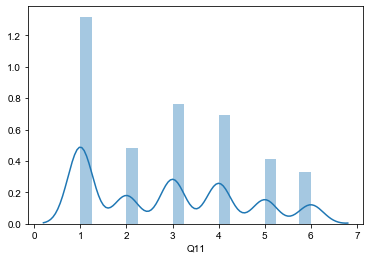

In [21]:
sns.distplot(df["Q11"].dropna()) #plotting data to check the distribution

sns.set(rc={'figure.figsize':(8,6)})
# As we can see that data is not normally distributed so we will impute most frequent value

In [22]:
df['Q15'].unique() #checking unique values of Q15 column

array(['1-2 years', 'I have never written code', '< 1 years', '20+ years',
       '3-5 years', '5-10 years', '10-20 years', nan], dtype=object)

In [23]:
Q15_m = {'Q15' : {'I have never written code' : 1, #Converting coding experience range into numerical data type by label encoding
                 '< 1 years' :2,
                 '1-2 years' :3,
                 '3-5 years' :4,
                 '5-10 years' :5,
                 '10-20 years' :6,
                 '20+ years' :7}}
df.replace(Q15_m, inplace=True) # replacing original categorical column with new label encoded column

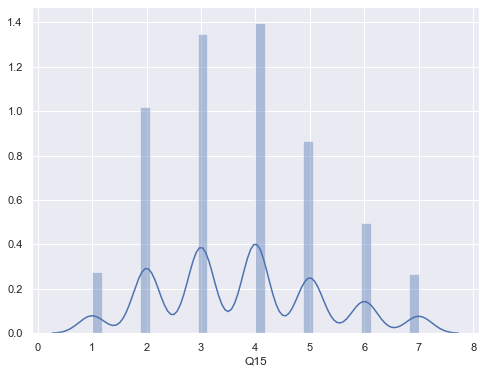

In [25]:
sns.distplot(df["Q15"].dropna()) #plotting data to check the distribution

sns.set(rc={'figure.figsize':(8,6)})
# As we can see that data is almost normally distributed so we will impute most frequent value as mean and mode would be almost same for this data set


In [27]:
df['Q22'].unique() #checking unique values of Q22 column

array(['Never', nan, 'Once', '6-24 times', '2-5 times', '> 25 times'],
      dtype=object)

In [28]:
Q22_m = {'Q22' : {'Never' : 1, #Converting TPU experience range into numerical data type by label encoding
                 'Once' : 2,
                 '2-5 times':3,
                 '6-24 times':4,
                  '> 25 times':5}}
df.replace(Q22_m, inplace=True) # replacing original categorical column with new label encoded column

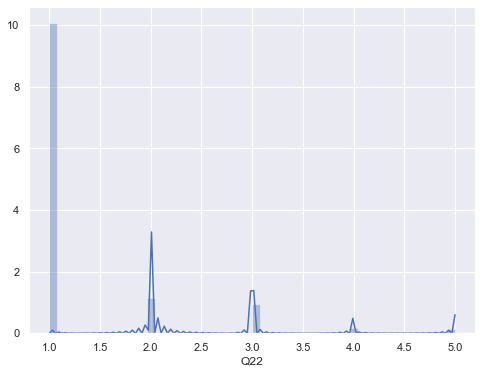

In [29]:
sns.distplot(df["Q22"].dropna()) #plotting data to check the distribution

sns.set(rc={'figure.figsize':(8,6)}) 
# as we can see that data is not normally distributed so we will impute most frequent value

In [30]:
df['Q23'].unique() #checking unique values of Q23 column

array(['1-2 years', nan, '2-3 years', '< 1 years', '10-15 years',
       '3-4 years', '4-5 years', '5-10 years', '20+ years'], dtype=object)

In [31]:
Q23_m = {'Q23': {'< 1 years':1, #Converting ML methods experience range into numerical data type by label encoding
                '1-2 years':2,
                '2-3 years':3,
                '3-4 years':4,
                '4-5 years':5,
                '5-10 years':6,
                '10-15 years':7,
                '20+ years':8}}
df.replace(Q23_m, inplace=True) # replacing original categorical column with new label encoded column


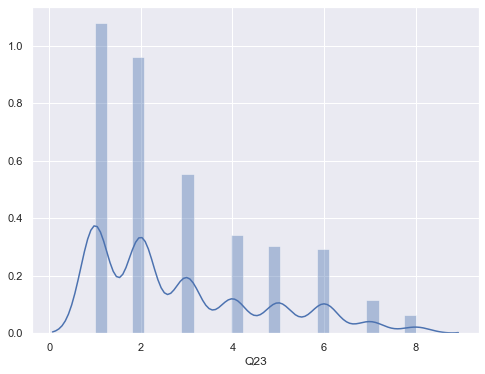

In [32]:
sns.distplot(df["Q23"].dropna()) #plotting data to check the distribution

sns.set(rc={'figure.figsize':(8,6)})
# as we can see that data is not normally distributed so we will impute most frequent value

In [33]:
df.select_dtypes(np.number).head(3) #checking all numerical columns after label encoding of some columns 

,Q1,Q6,Q7,Q11,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q15,Q22,Q23,Q10_Encoded
0,22,4,1,1.0,0,-1,-1,-1,-1,3.0,1.0,2.0,3
1,40,5,7,6.0,-1,-1,-1,-1,0,1.0,NaN,NaN,0
2,40,5,7,5.0,-1,-1,-1,0,-1,3.0,2.0,3.0,14


### Imputing missing values in numerical columns with most frequent value(mode) and in categorical column with "Unknown" word

In [35]:
# Using simple imputer function I am imputing missing values with most frequent value of that particular column

si = SimpleImputer(strategy='most_frequent', missing_values=np.nan, fill_value='Replacement_Value')
df[['Q11','Q14_Part_1_TEXT','Q14_Part_2_TEXT','Q14_Part_3_TEXT','Q14_Part_4_TEXT','Q14_Part_5_TEXT','Q15','Q22','Q23']]= si.fit_transform(X=df[['Q11','Q14_Part_1_TEXT','Q14_Part_2_TEXT','Q14_Part_3_TEXT','Q14_Part_4_TEXT','Q14_Part_5_TEXT','Q15','Q22','Q23']])

In [37]:
# Replacing all NaN values by kewyword 'Unknown' in the columns which has data type 'Object'

df_c = df.replace(np.nan , 'Unknown') 

In [38]:
df_c.head(2) # clean dataframe with no NaN values 

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded
0,22,Male,France,Master’s degree,Software Engineer,4,1,I do not know,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,3
1,40,Male,India,Professional degree,Software Engineer,5,7,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0


### Encoding Categorical Data.......................................................................................................................

#### Machine learning models and algorithms are based on mathematics of numerical equations and variables . For further processing we need to convert our categorical data into numeric data type. For that there are several encoding methods. 

#### Two principal methods are: 
#### 1) Label encoding and
#### 2) one-hot encoding

- In label encoding, data is encoded by labels between 0 to (n_samples - 1). where n is distinct labels. Since it encodes the data with different number, the model will misunderstands the data by considering the numbers as weight assign to the feature data. It understands that there is some kind of order like 0<1<2 and so on and that's why model may derive some kind of correlation between data  like as the country label increases the salary of data scientist also increases but this could not be the actual scenario in prediction. So label encoding is not useful for non ordinal data set. I have already used label encoding for ordinal columns which has data in some sort of sequece. Using label encoding for the whole data set would not be a wise choice as it will establish assumptions for our model.

-  In one hot encoding, it splits the data in binary. It forms multiple columns of distinct data and gives the values of  0s and 1s according to the distinct data value. Advantage of this method is that it prevents our ML model from thinking that there is some kind of relative order in varibales. It will  not make any assumption of correlation between features. That's why I am using One hot encoding to encode my categorical data by using get_dummies. 

In [39]:
obj_df = df_c.select_dtypes(include=['object']) # Generating new dataframe with the all object data type
num_df = df_c.select_dtypes(np.number) #Generating new dataframe with the all numeric data type
print(obj_df.shape)
print(num_df.shape)

(12497, 209)
(12497, 13)


In [40]:
# Applying One hot encoding to all categorical dataset

cols = obj_df.columns 

obj_df_he = pd.get_dummies(obj_df, prefix_sep="__",
                                  columns=cols)   

In [41]:
obj_df_he.head(3)

,Q2__Female,Q2__Male,Q2__Prefer not to say,Q2__Prefer to self-describe,Q3__Algeria,Q3__Argentina,Q3__Australia,Q3__Austria,Q3__Bangladesh,Q3__Belarus,...,Q34_Part_8__AWS DynamoDB,Q34_Part_8__Unknown,Q34_Part_9__Azure SQL Database,Q34_Part_9__Unknown,Q34_Part_10__Google Cloud SQL,Q34_Part_10__Unknown,Q34_Part_11__None,Q34_Part_11__Unknown,Q34_Part_12__Other,Q34_Part_12__Unknown
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,1,1,0,0,1,0,1,0,1


In [42]:
obj_df_he.reset_index(drop=True, inplace=True)
num_df.reset_index(drop=True, inplace=True)

data = [obj_df_he,num_df] # generating a list with two dataframes to merge the datarames in final dataframe

#final dataframe with all numerical values

df_f= pd.concat(data, axis=1) 

df_f.head()

,Q2__Female,Q2__Male,Q2__Prefer not to say,Q2__Prefer to self-describe,Q3__Algeria,Q3__Argentina,Q3__Australia,Q3__Austria,Q3__Bangladesh,Q3__Belarus,...,Q11,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q15,Q22,Q23,Q10_Encoded
0,0,1,0,0,0,0,0,0,0,0,...,1.0,0.0,-1.0,-1.0,-1.0,-1.0,3.0,1.0,2.0,3
1,0,1,0,0,0,0,0,0,0,0,...,6.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,1.0,0
2,0,1,0,0,0,0,1,0,0,0,...,5.0,-1.0,-1.0,-1.0,0.0,-1.0,3.0,2.0,3.0,14


## (2) DATA EXPLORATION____________________________________________________ 

### Plot 1 : Country vs Salary

### In this plot, I represented countries vs salary bar graphs by grouping each country with its salary range and sorted it by its mean salary value. 

### As we can see that the trend of salary in each country is different. Being the top country in data scientist salary,  The United States has a mean salary of more than 100,000 dollars whereas Algeria has the least mean salary of less than 10,000 dollars. Seeing the bar graph of  'Country vs Salary', we can say that there is variation in the salaries with each country. So Country column may help us in predicting salary in our regression model.

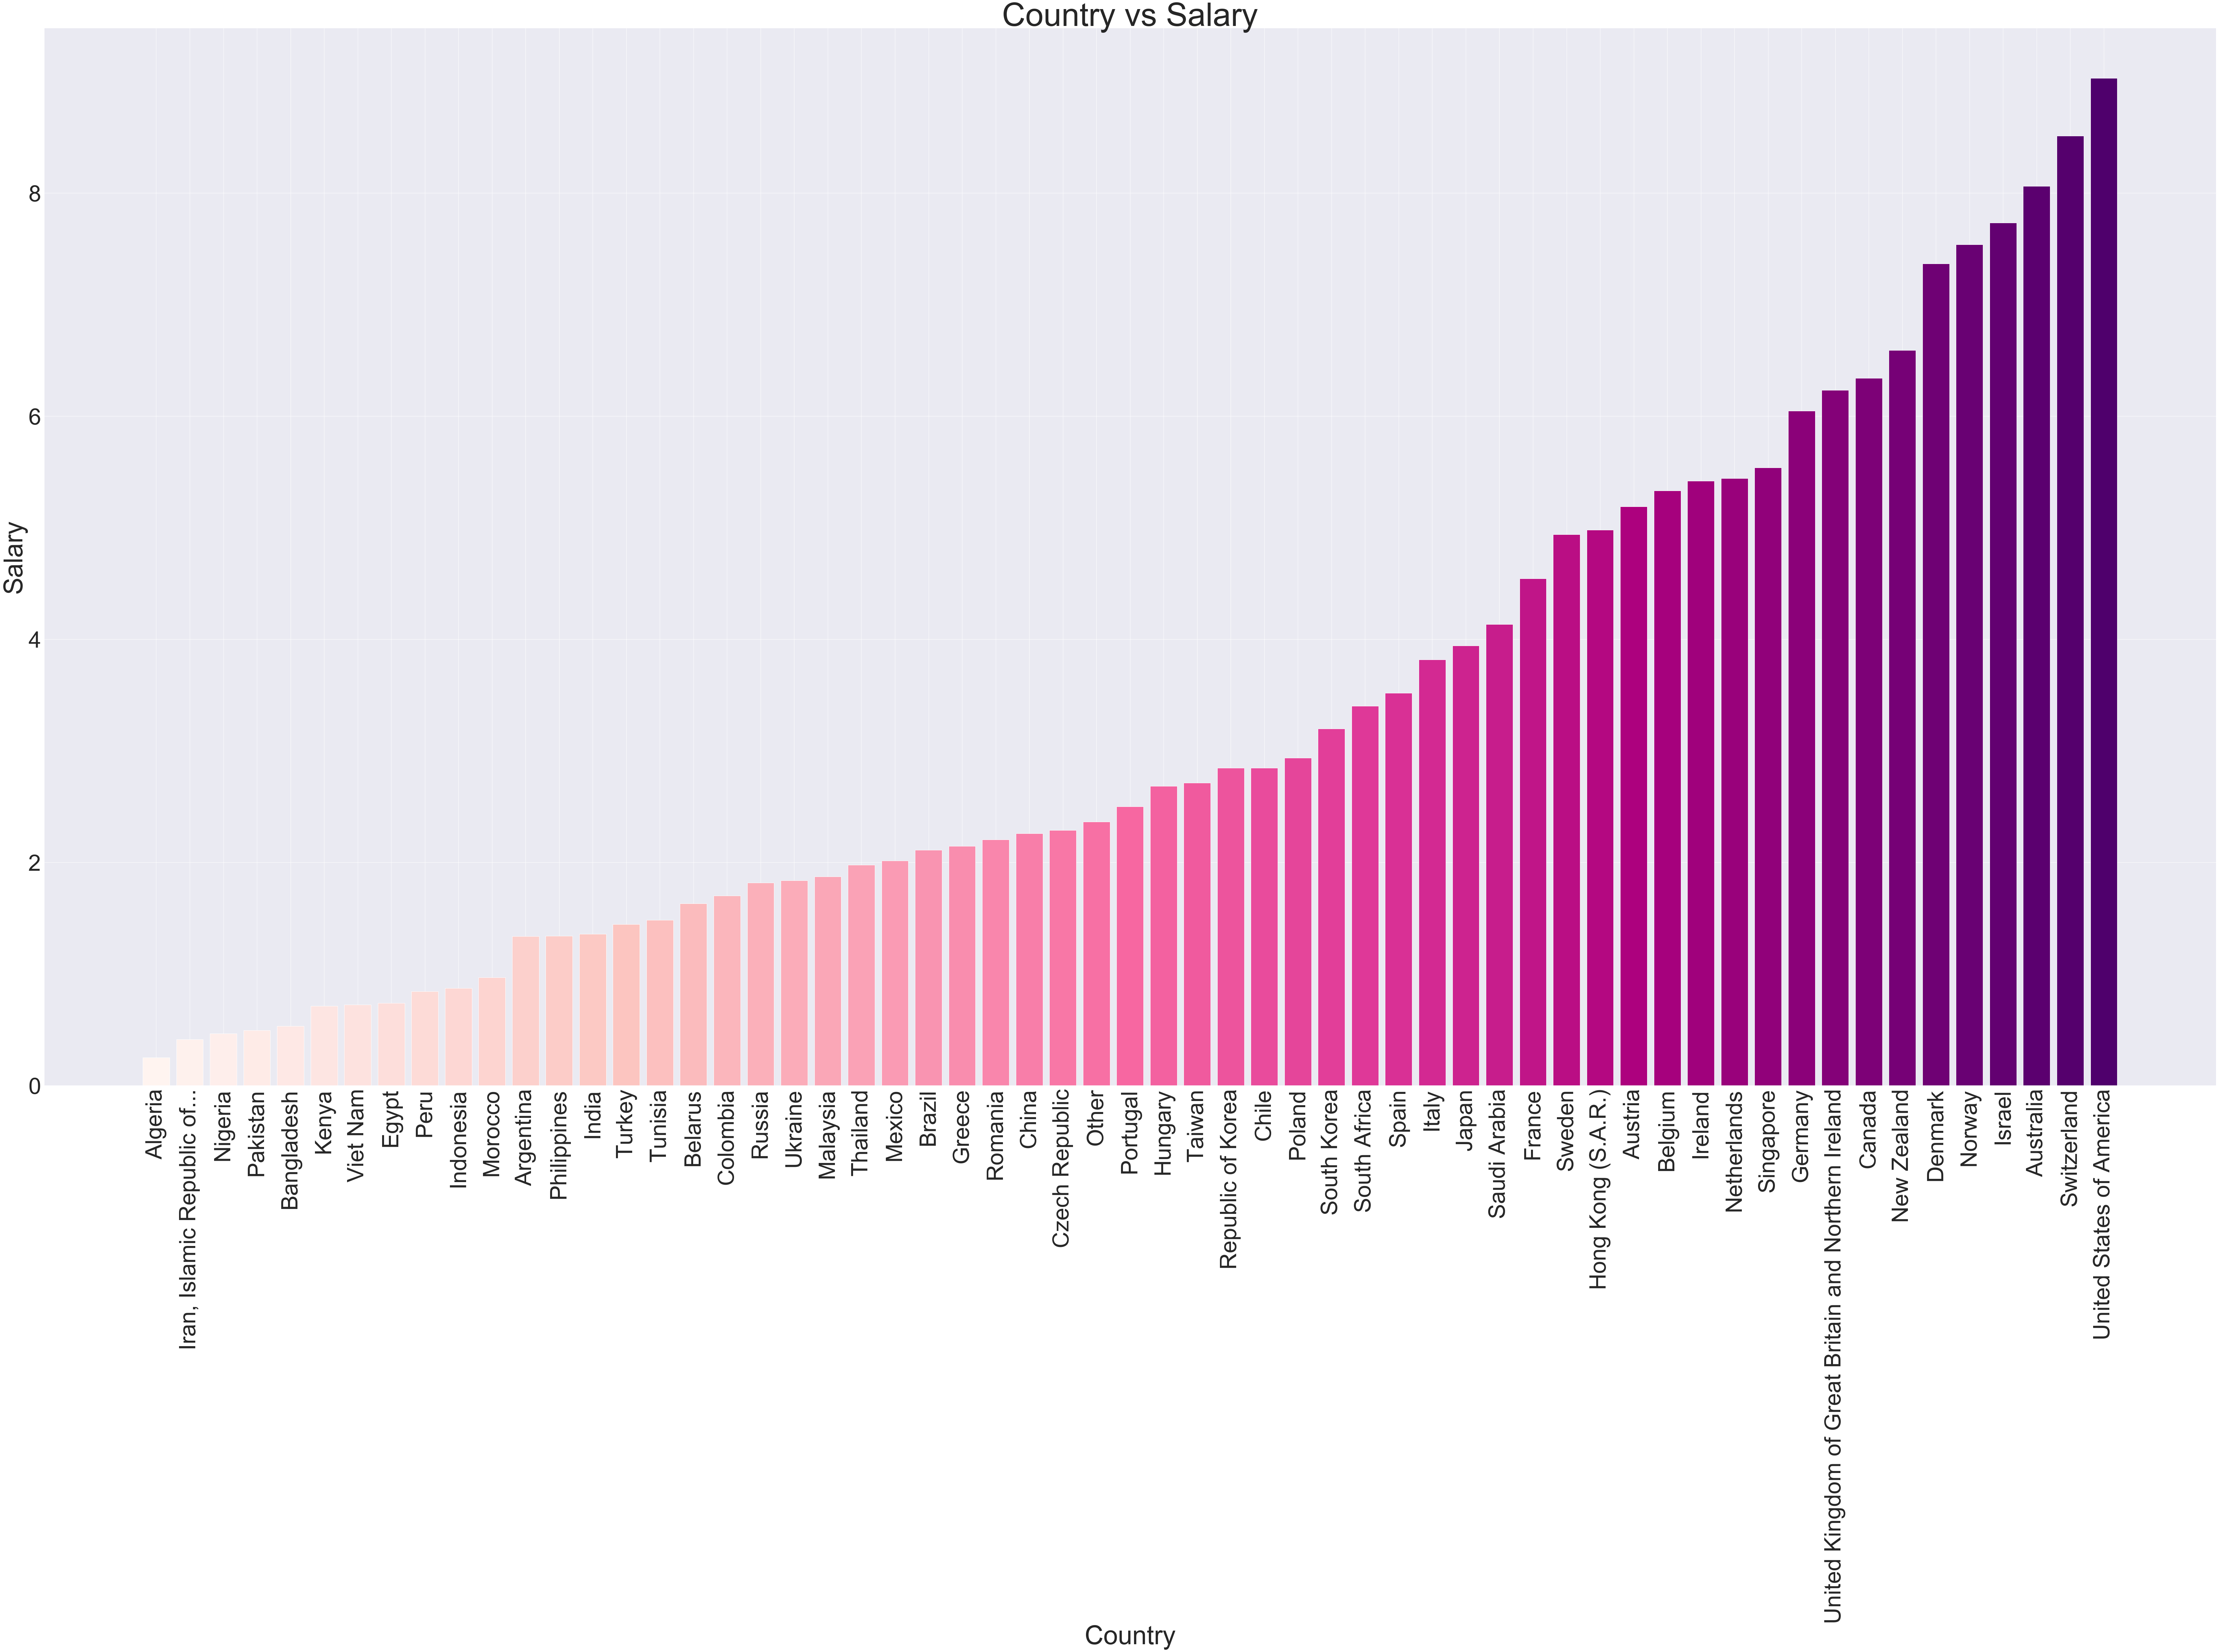

In [317]:
country_salary = pd.DataFrame(df_c.groupby('Q3')['Q10_Encoded'].mean().to_frame(name='Mean_Salary').reset_index().sort_values('Mean_Salary'))
plt.figure(figsize=(120,60))
x=country_salary['Q3'].values
y=country_salary['Mean_Salary'].values
plt.bar(x, y,  color = sns.color_palette('RdPu', len(x)))
plt.title('Country vs Salary', fontsize = 100)
plt.xlabel("Country", fontsize = 80) 
plt.ylabel("Salary" , fontsize = 80) 
plt.xticks(x,rotation='vertical')
plt.tick_params(labelsize=70)
plt.show() 

### Plot 2: Gender vs Salary

### In this box plot I have depicted Gender distribution with respect to degrees against salary. In this plot, we get to know about two possible potential features. 1) Gender and 2) Degree. 

### As we can see that all gender label with a doctoral degree has the highest salary compare to other degrees except 'prefer to self describe' label. Doctoral degree followed by a master's degree and a bachelor's degree in the plot is a very logical fact in the case of jobs and salary. 

### From this plot we can also make an inference that between Male and Female, Male is dominating the data science world with higher salary range in all degrees. 

### So Gender and Degree columns will help us to predict our target data.

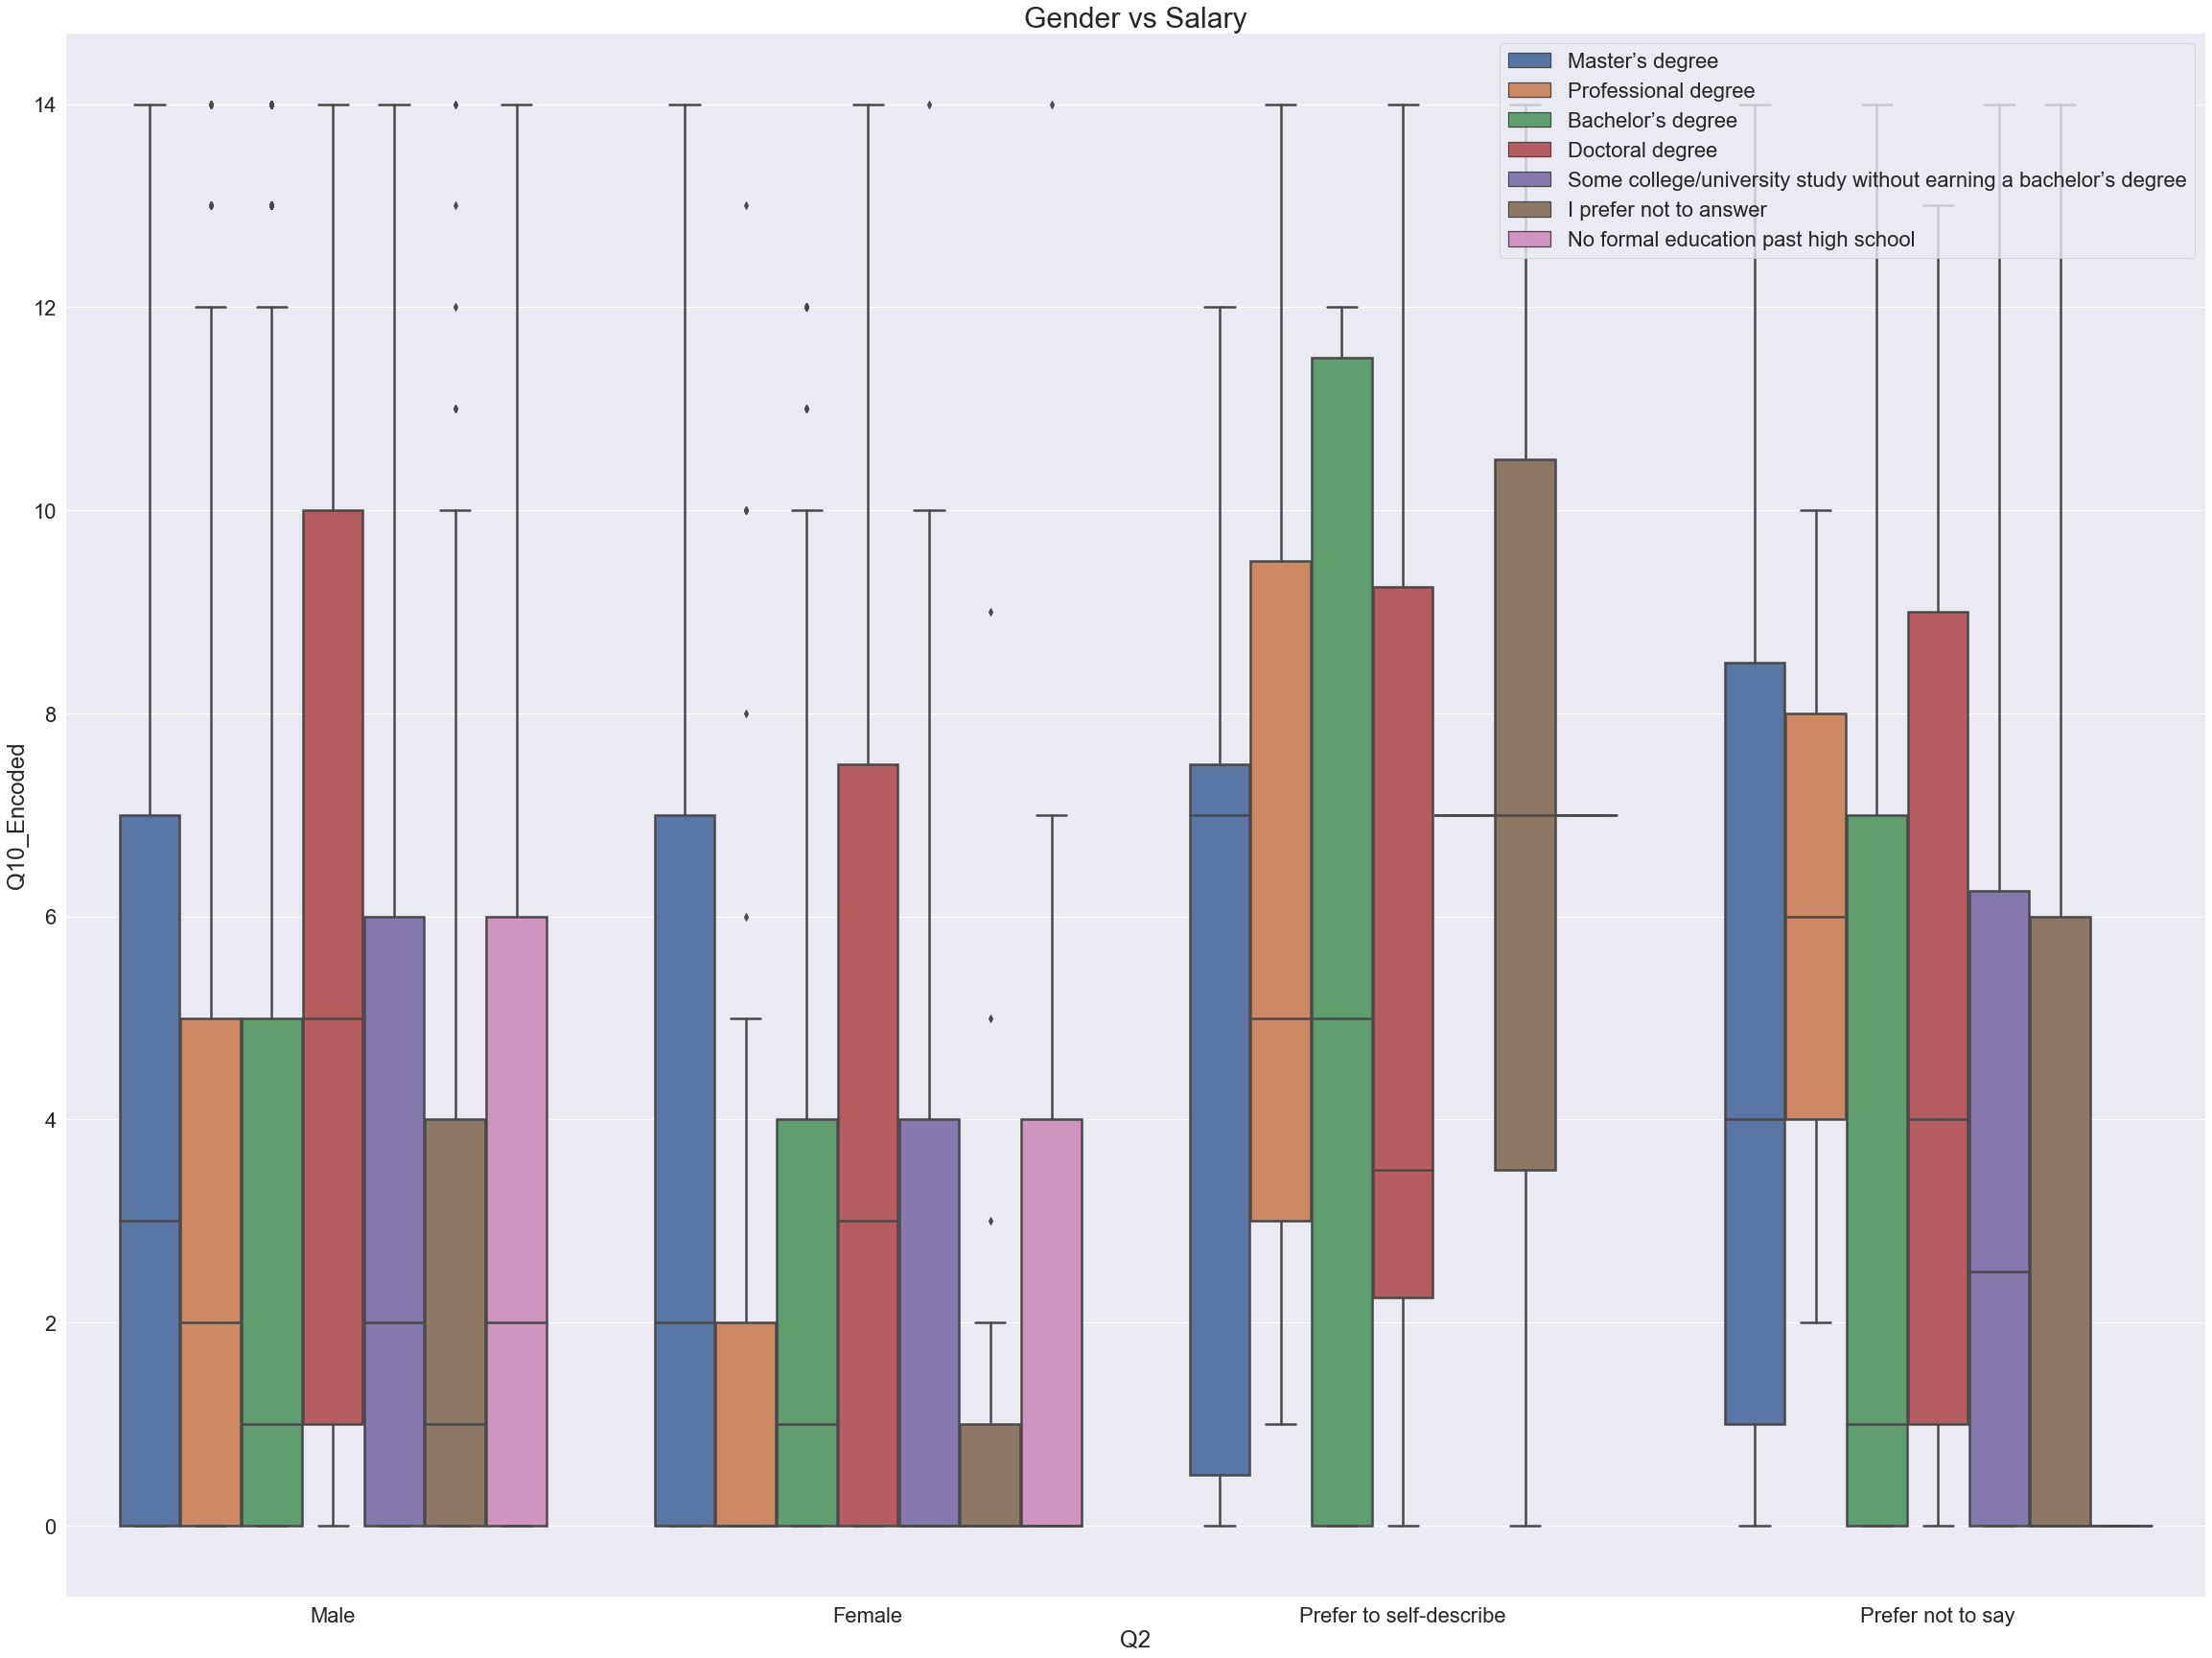

In [374]:
b=sns.boxplot(x="Q2", y="Q10_Encoded",hue = 'Q4', data=df_c)
sns.set(rc={'figure.figsize':(40,30)})
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
plt.legend(loc=1)
plt.title('Gender vs Salary', fontsize = 30)
plt.show(b) 

### Plot 3 : Age vs Salary

### This is the Age vs Salary bar plot. As we can see that as the age of the respondents' increases, their salary also increases. This is obvious as with age experience in the data science field also increases. so the trend of age might help us in predicting salary in our model. 

No handles with labels found to put in legend.


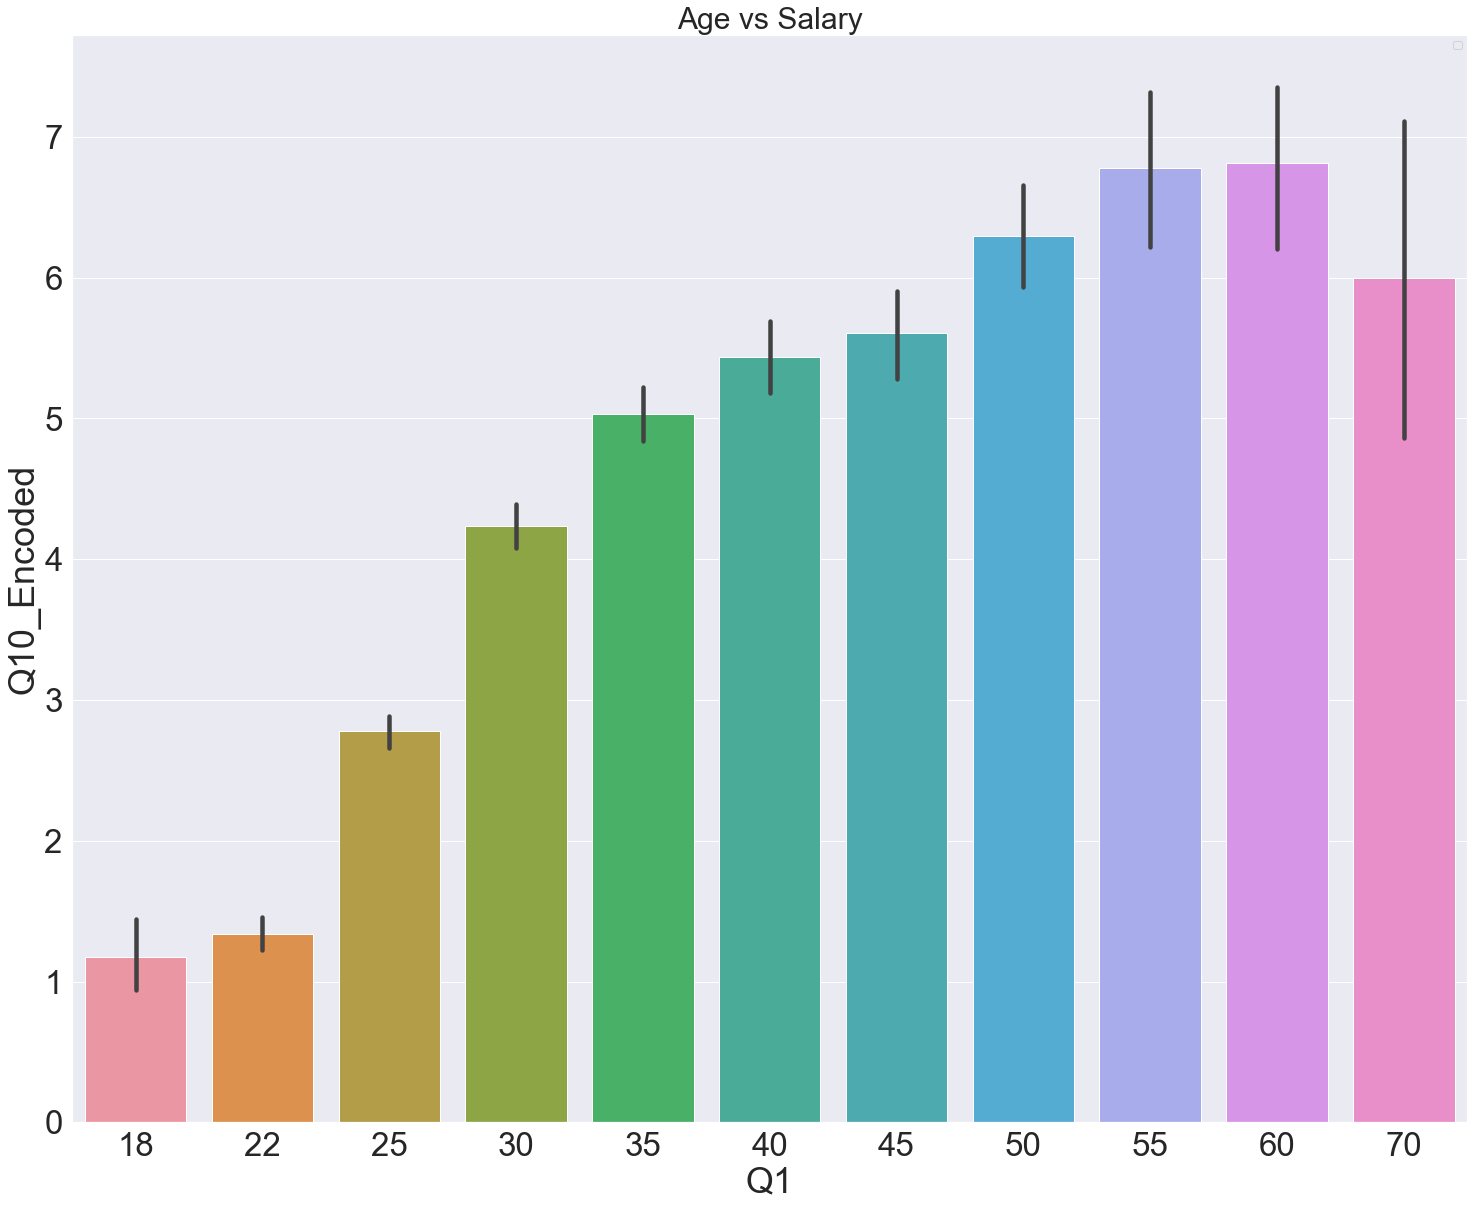

In [372]:
b=sns.barplot(x="Q1", y="Q10_Encoded", data=df_c)
sns.set(rc={'figure.figsize':(15,10)})
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
plt.title('Age vs Salary', fontsize = 30)
plt.legend(loc=1)
plt.show(b) 

### Plot 4:  ML method experience vs Salary

### This plot is to support the above conclusion. In this graph, I plot ML methods experience against the salary range.  As we can see that as experience in using Machine Learning methods increases, salary also increases. It is pretty obvious as with experience, expertise also increases and which would culminate into more salary. So ML method experience column might be one of the important features in our dataset. 

No handles with labels found to put in legend.


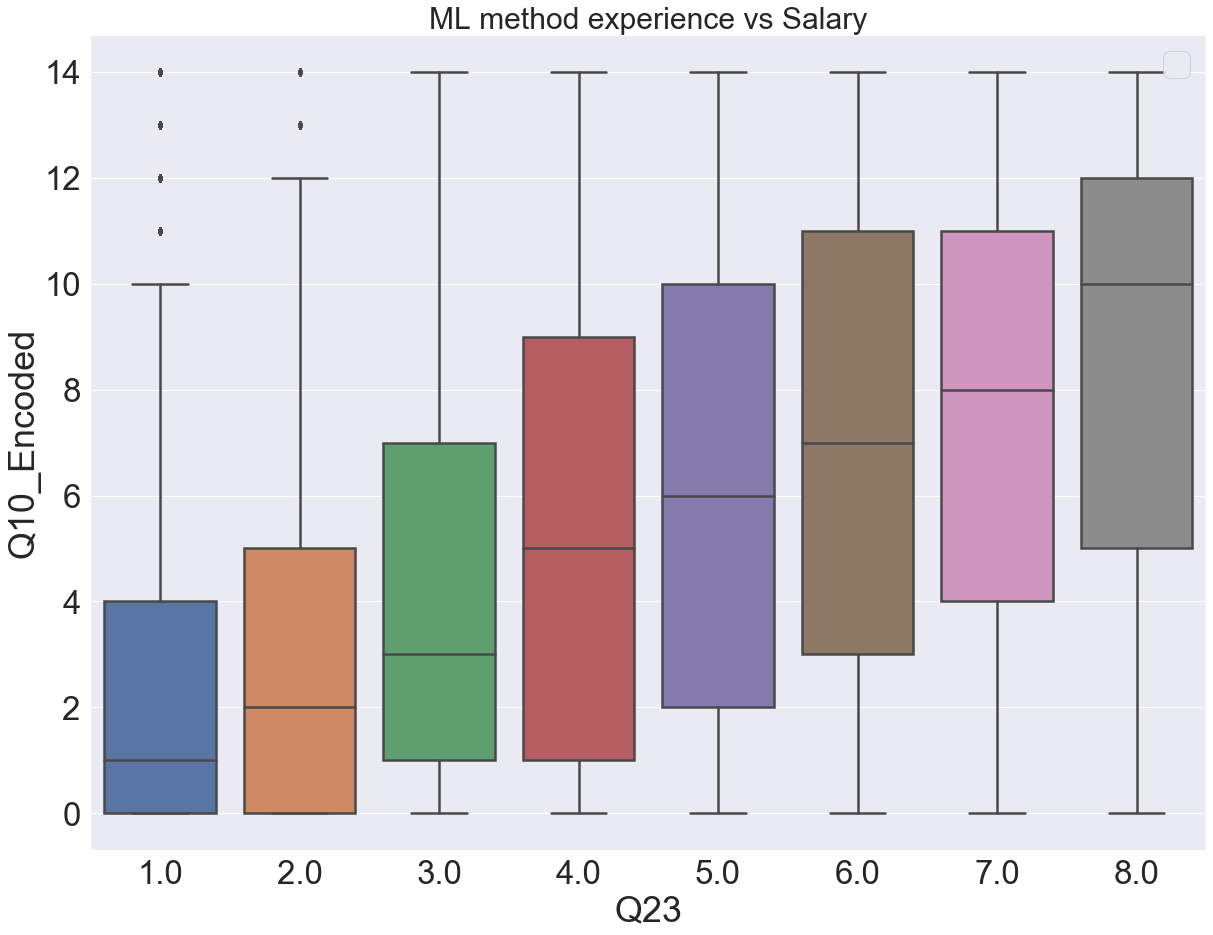

In [371]:
b=sns.boxplot(x="Q23", y="Q10_Encoded", data=df_c)
sns.set(rc={'figure.figsize':(25,20)})
sns.set_context("notebook", font_scale=3, rc={"lines.linewidth": 2.5})
plt.title('ML method experience vs Salary', fontsize = 30)
plt.legend(loc=1)
plt.show(b) 

### Plot 5: Monet spent on ML vs Salary. 

### We can clearly see the increasing trend of salary with increasing money spent to learn ML methods. So money spent on ML can be one of the important features. 

No handles with labels found to put in legend.


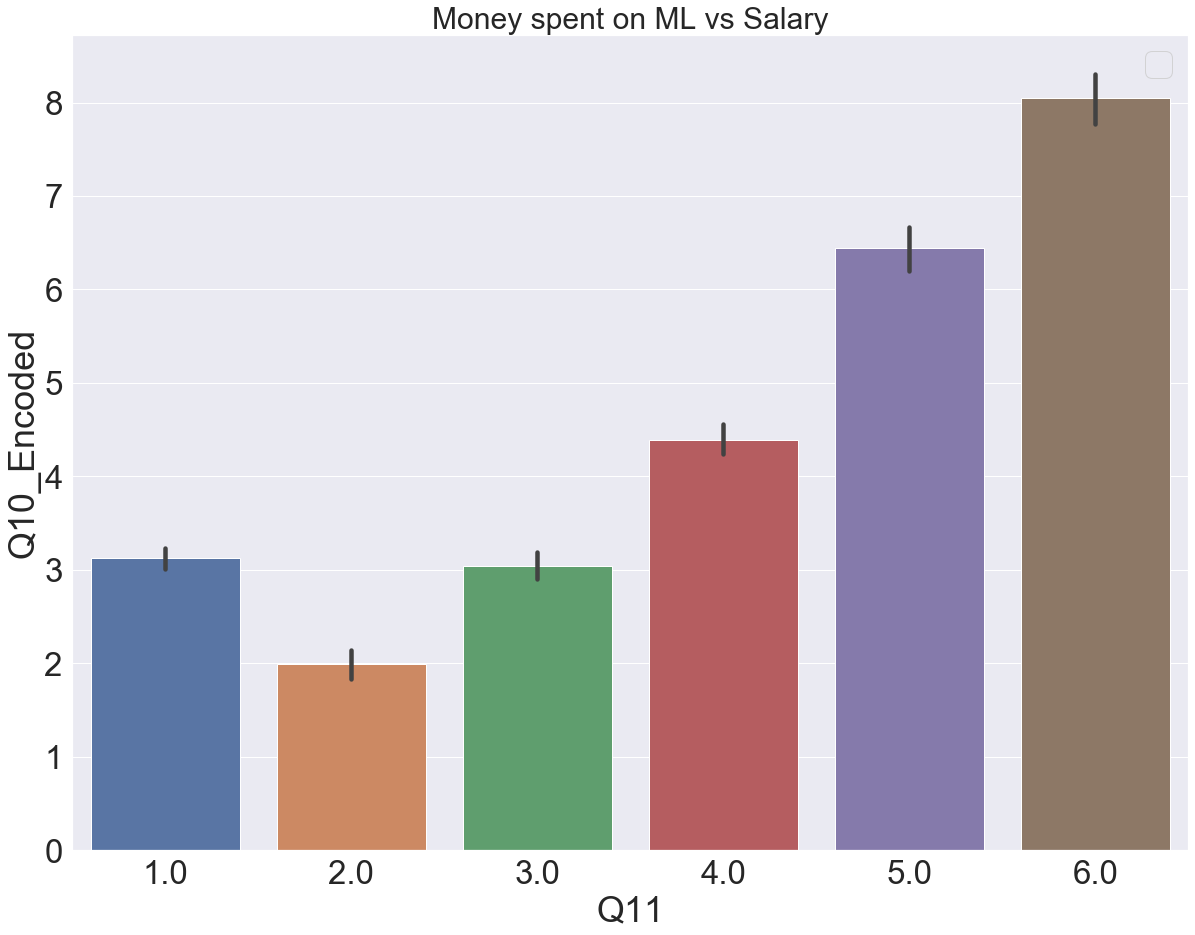

In [370]:
b=sns.barplot(x="Q11", y="Q10_Encoded", data=df_c)
sns.set(rc={'figure.figsize':(20,15)})
sns.set_context("notebook", font_scale=3, rc={"lines.linewidth": 2.5})
plt.title('Money spent on ML vs Salary', fontsize = 30)
plt.legend(loc=1)
plt.show(b) 

### Plot 6: Coding experience vs Salary

### Again as experience in coding increases, salary increases. So coding experience could be an important feature in predicting our target variable.

No handles with labels found to put in legend.


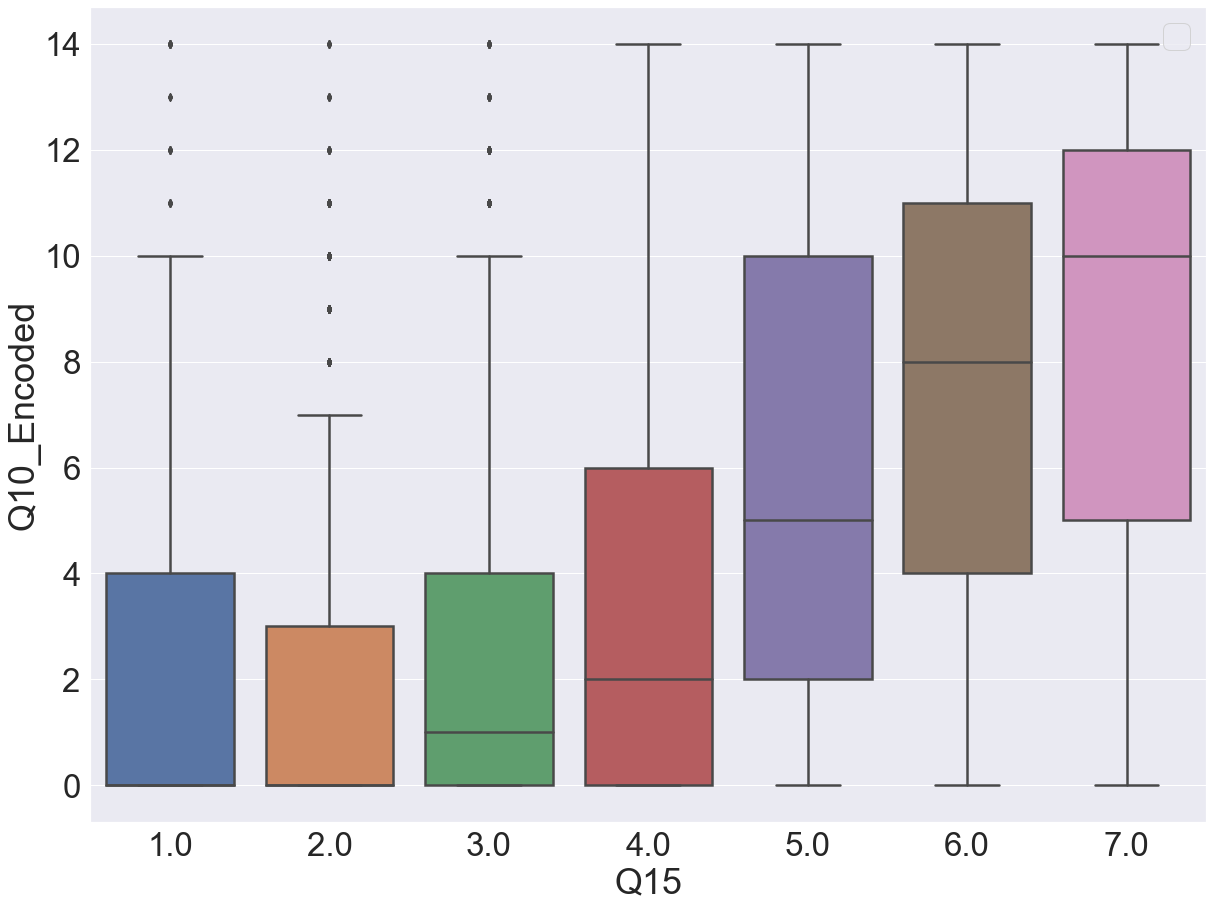

In [325]:
b=sns.boxplot(x="Q15", y="Q10_Encoded", data=df_c)
sns.set(rc={'figure.figsize':(20,15)})
sns.set_context("notebook", font_scale=3, rc={"lines.linewidth": 2.5})
plt.legend(loc=1)
plt.show(b) 

### Correlation matrix gives us the fetures which are highly correlated to our target variable.

In [272]:
corr = df_f.corr() # finding correlation matrix
corr.head(3)

,Q2__Female,Q2__Male,Q2__Prefer not to say,Q2__Prefer to self-describe,Q3__Algeria,Q3__Argentina,Q3__Australia,Q3__Austria,Q3__Bangladesh,Q3__Belarus,...,Q11,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q15,Q22,Q23,Q10_Encoded
Q2__Female,1.000000,-0.941277,-0.048157,-0.020299,0.007340,-0.005975,0.001047,-0.008376,-0.025465,0.004769,...,-0.055469,0.025825,0.024318,0.018425,-0.031747,-0.012950,-0.059841,-0.047354,-0.071583,-0.062403
Q2__Male,-0.941277,1.000000,-0.264732,-0.111586,-0.004739,0.004610,-0.002228,0.006764,0.021108,-0.001972,...,0.049825,-0.024371,-0.024130,-0.016222,0.031678,0.003267,0.050140,0.040872,0.066786,0.052285
Q2__Prefer not to say,-0.048157,-0.264732,1.000000,-0.005709,-0.006255,0.005455,0.006648,0.005283,0.012080,-0.007074,...,0.012597,-0.005293,0.005953,-0.001814,-0.003728,0.023896,0.022552,0.007161,0.005249,0.014867


In [282]:
corr_target = abs(corr["Q10_Encoded"])

# Finding relevant features by filtering our correlation matrix with the features which has greater than 0.2 correlation with target data
relevant_features = corr_target[corr_target>0.2]
relevant_features =pd.DataFrame(relevant_features)


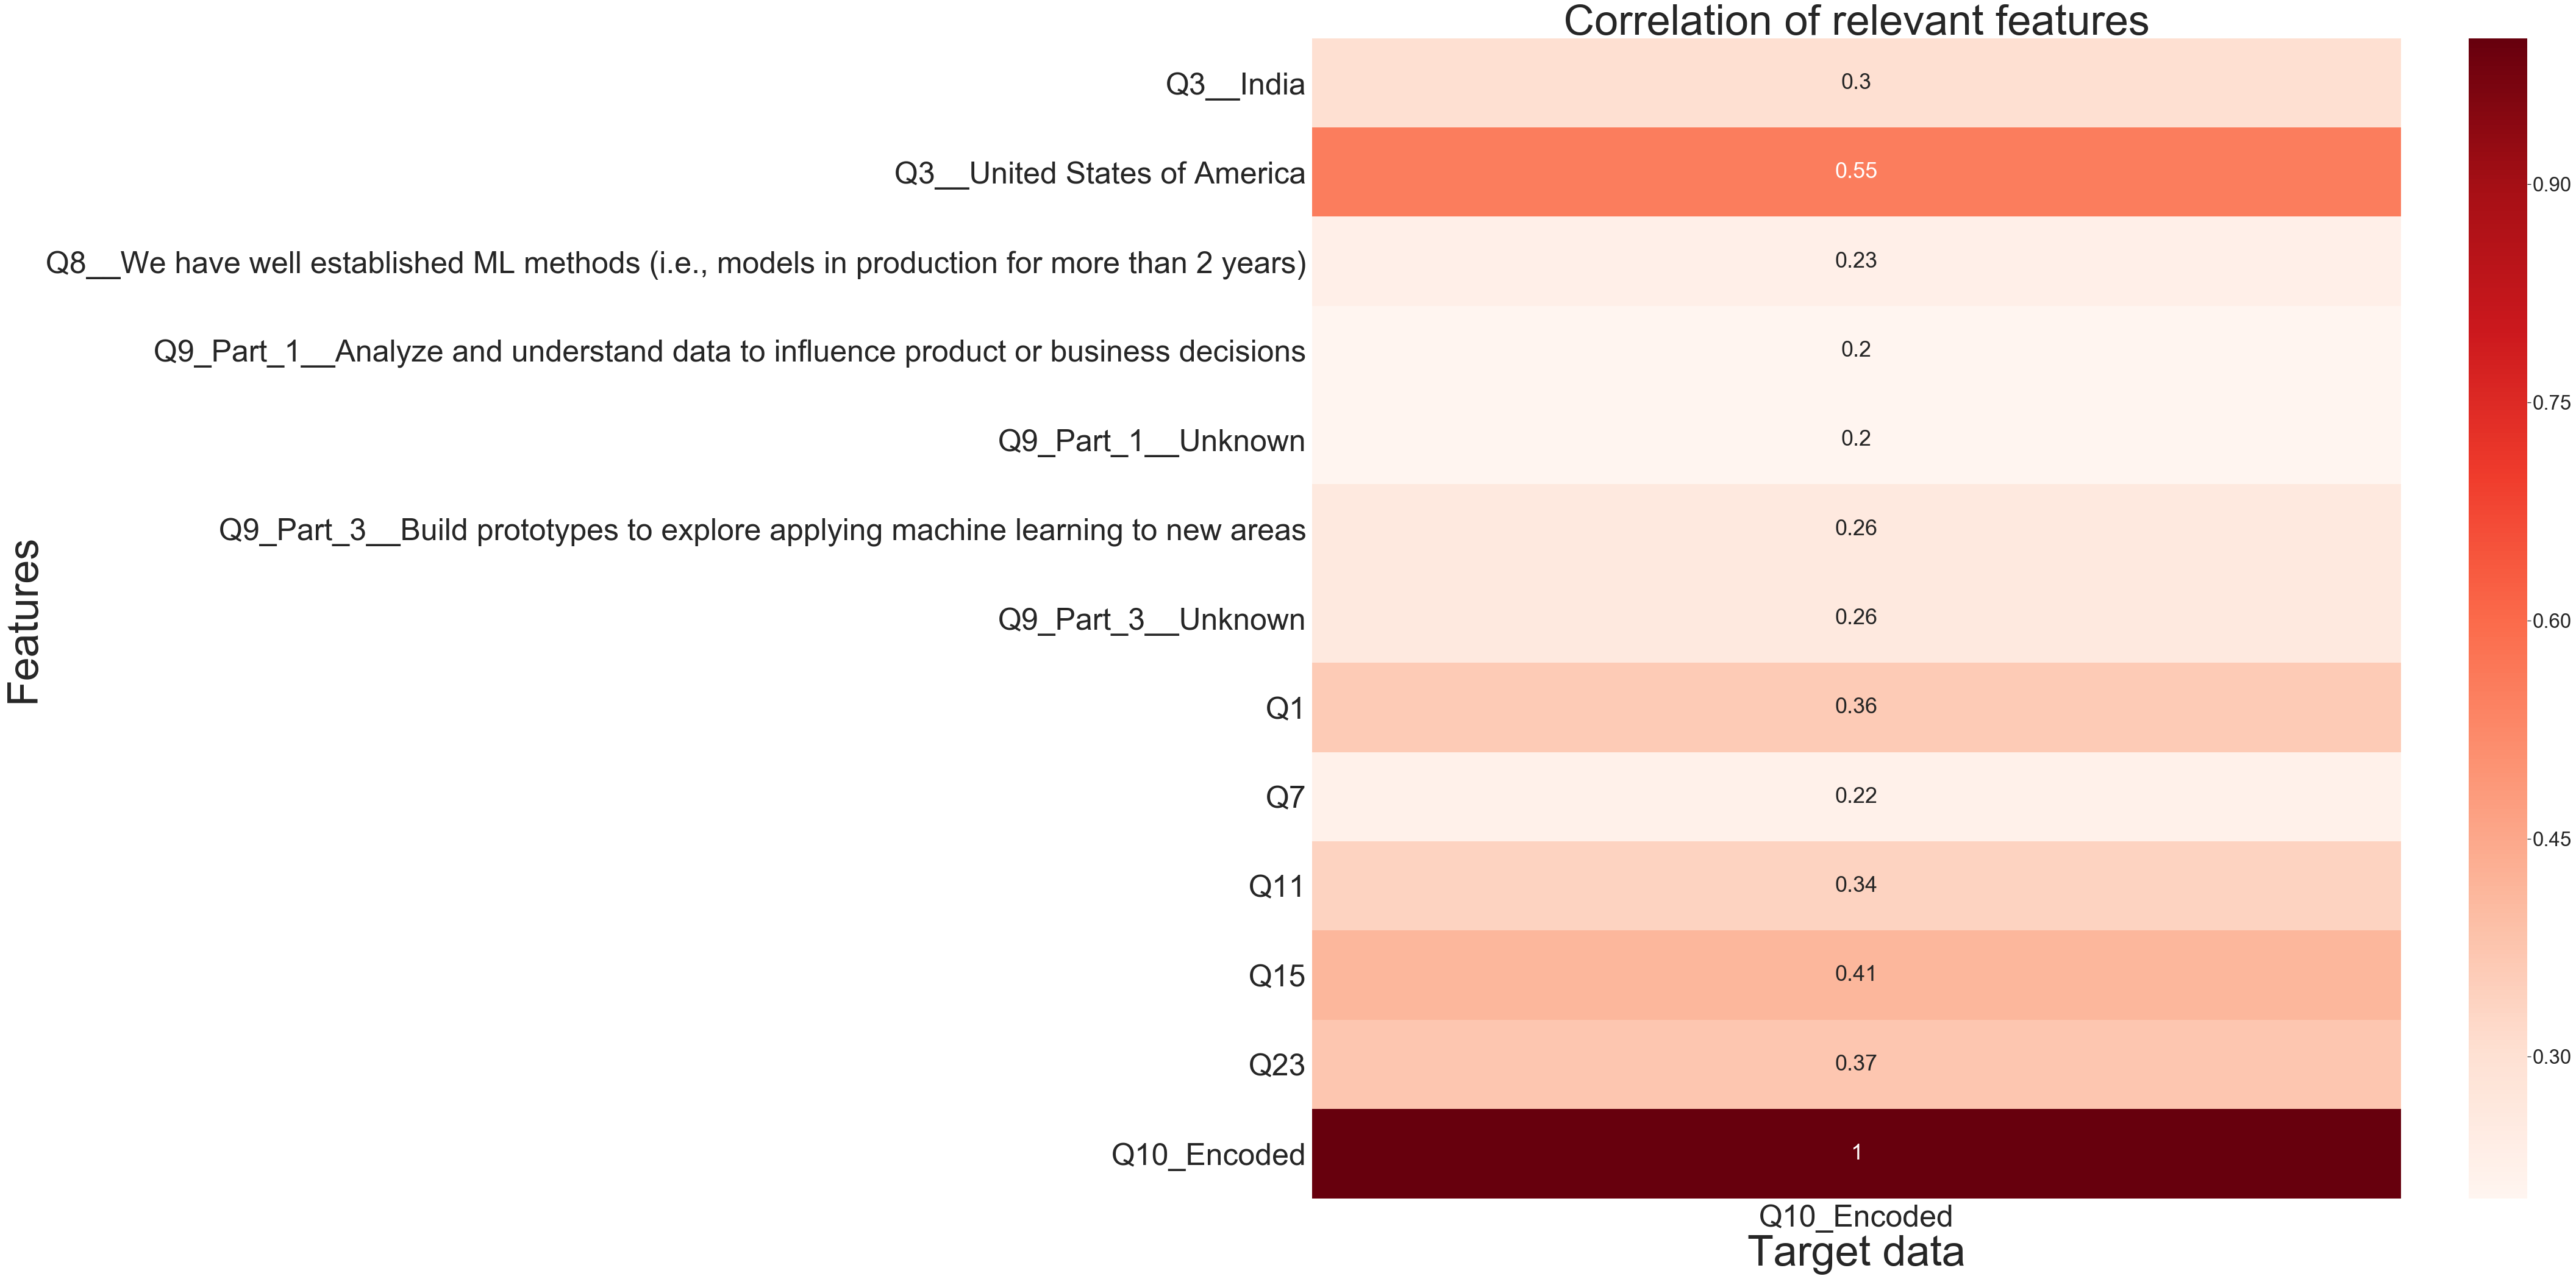

In [326]:
# plotting the heat map of relevant features

plt.figure(figsize=(40,35))
sns.heatmap(relevant_features, annot=True, cmap=plt.cm.Reds)
plt.title(' Correlation of relevant features ' , size = 70)
plt.xlabel('Target data',  size = 70)
plt.ylabel('Features',  size = 70)
plt.xticks(size=50)
plt.yticks(size=50)
plt.show()

## (3) FEATURE SELECTION_________________________________________________

### Feature selection is an important step in Machine Learning model. Since we are reducing the number of features in our dataset by choosing only important features we are reducing the variance of our dataset which furthermore helps us in preventing the overfitting of our model. It also reduces the computational cost and time to train our training dataset. 

### There are several feature selection methods based on the type of features and target variables.
### I am using Random Forest as a Feature selection method. There are several methods for feature selection and dimensionality reduction.  PCA is a very popular dimensionality reduction method but I am not using this method as PCA gives me eigenvectors which may or may not be a combination of my features. So I will not be able to know about original feature importance. 

**Random Forest Feature Selection Method: **

- Random forest consist a number of decision trees. Each decision tree is made by random extraction of features. Features are being bootstrapped into a new dataset and random extraction confirms that the decison tree does not have seen all the data. Therefore less prone to overfitting. The importance of each feature is derived from how less it is impure. This impurity is measured by either the Gini impurity or the entropy.
- It calculates the impurity of each feature in all decision trees. If feature decreases impurity and gives leaf node then feature is important and if a feature is not giving less impurity then that feature is not important. In random forests, the impurity decrease from each feature can be averaged across decision trees to get the final importance of the features.
- The features, which are selected as root nodes are more important compare to the features selected at the end nodes.

In [377]:
# splitting data set in feature and target
X = df_f.iloc[ : , 0:522]
y = df_f.iloc[ : , 522]

In [51]:
# Split the data into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [52]:
# Creating a random forest classifier
rfc = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
features = X.columns


rfc.fit(X_train, y_train) # training the classifier

# Print the name and gini importance of each feature
for feature in zip(features, rfc.feature_importances_):
    print(feature)

('Q2__Female', 0.0033718486509366273)
('Q2__Male', 0.0035365533424153287)
('Q2__Prefer not to say', 0.0007403953829702399)
('Q2__Prefer to self-describe', 0.00019514576028960653)
('Q3__Algeria', 9.623984361832029e-05)
('Q3__Argentina', 0.0006984952605147008)
('Q3__Australia', 0.0014500645814836347)
('Q3__Austria', 0.00025002169105342565)
('Q3__Bangladesh', 0.00018957802675817693)
('Q3__Belarus', 0.00023921124994344823)
('Q3__Belgium', 0.0003761883808653672)
('Q3__Brazil', 0.001648209501718033)
('Q3__Canada', 0.0024621611917293564)
('Q3__Chile', 0.00048074265599670974)
('Q3__China', 0.0009197760191889281)
('Q3__Colombia', 0.0004706976197939031)
('Q3__Czech Republic', 0.0002947056200515509)
('Q3__Denmark', 0.00033221248148307316)
('Q3__Egypt', 0.00020814606449144044)
('Q3__France', 0.0017796245167561505)
('Q3__Germany', 0.00234447760342392)
('Q3__Greece', 0.0005865336353769735)
('Q3__Hong Kong (S.A.R.)', 0.00030478941029663323)
('Q3__Hungary', 0.0004252263591924761)
('Q3__India', 0.00928

In [53]:
# selecting features from selectfrommodel function which directly gives me important features
model = SelectFromModel(rfc, threshold=0.004) # filtering features by importance more than 0.004

# Training the data
model.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=-1,
                                                 oob_score=False,


In [54]:
# Print the names of the most important features

for feature_list_index in model.get_support(indices=True):
    print(features[feature_list_index])

Q3__India
Q3__United States of America
Q4__Bachelor’s degree
Q4__Master’s degree
Q5__Data Scientist
Q5__Software Engineer
Q8__We are exploring ML methods (and may one day put a model into production)
Q8__We have well established ML methods (i.e., models in production for more than 2 years)
Q9_Part_1__Analyze and understand data to influence product or business decisions
Q9_Part_1__Unknown
Q9_Part_3__Build prototypes to explore applying machine learning to new areas
Q9_Part_3__Unknown
Q12_Part_4__Kaggle (forums, blog, social media, etc)
Q12_Part_4__Unknown
Q12_Part_6__Unknown
Q12_Part_6__YouTube (Cloud AI Adventures, Siraj Raval, etc)
Q12_Part_8__Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)
Q12_Part_8__Unknown
Q13_Part_2__Coursera
Q13_Part_2__Unknown
Q13_Part_6__Kaggle Courses (i.e. Kaggle Learn)
Q13_Part_6__Unknown
Q13_Part_8__Udemy
Q13_Part_8__Unknown
Q1
Q6
Q7
Q11
Q14_Part_1_TEXT
Q14_Part_4_TEXT
Q15
Q23


In [55]:
selected_feat= X_train.columns[(model.get_support())]
len(selected_feat)

32

In [61]:
#Creating dataframes for important features 

df1 = df_f[df_f.columns[pd.Series(df_f.columns).str.startswith('Q3__')]]
df2 = df_f[df_f.columns[pd.Series(df_f.columns).str.startswith('Q4__')]]
df3 = df_f[df_f.columns[pd.Series(df_f.columns).str.startswith('Q5__')]]
df4 = df_f[df_f.columns[pd.Series(df_f.columns).str.startswith('Q8__')]]
df5 = df_f[df_f.columns[pd.Series(df_f.columns).str.startswith('Q9_')]]
df6 = df_f[df_f.columns[pd.Series(df_f.columns).str.startswith('Q12_')]]
df7 = df_f[df_f.columns[pd.Series(df_f.columns).str.startswith('Q13_')]]
df8 = df_f[df_f.columns[pd.Series(df_f.columns).str.startswith('Q14__')]]

In [62]:
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df3.reset_index(drop=True, inplace=True)
df4.reset_index(drop=True, inplace=True)
df5.reset_index(drop=True, inplace=True)
df6.reset_index(drop=True, inplace=True)
#df7.reset_index(drop=True, inplace=True)
df8.reset_index(drop=True, inplace=True)
dfs = [df1,df2,df3,df4,df5,df6,df7,df8]

In [63]:
# merging all the important features in one dataframe

final_df = pd.concat(dfs, axis=1) # final dataframe after feature selection 
final_df[['Q1','Q6','Q7','Q11','Q15','Q23','Q10_Encoded']]= df_f[['Q1','Q6','Q7','Q11','Q15','Q23','Q10_Encoded']]
final_df.head()

,Q3__Algeria,Q3__Argentina,Q3__Australia,Q3__Austria,Q3__Bangladesh,Q3__Belarus,Q3__Belgium,Q3__Brazil,Q3__Canada,Q3__Chile,...,"Q14__Local development environments (RStudio, JupyterLab, etc.)",Q14__Other,Q14__Unknown,Q1,Q6,Q7,Q11,Q15,Q23,Q10_Encoded
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,22,4,1,1.0,3.0,2.0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,40,5,7,6.0,1.0,1.0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,40,5,7,5.0,3.0,3.0,14
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,22,1,1,1.0,2.0,1.0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,50,1,3,5.0,7.0,7.0,6


## (4) ORDINAL LOGISTIC REGRESSION MODEL IMPLEMENTATION_______________

In [179]:
X1 = final_df.iloc[ : , 0:159] # selecting feature set
y1 = final_df.iloc[ : , 159]   # target variables

# we split our data into training set and testing set with test size of 30% of the data to tarin and test our model
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0, test_size=0.3)

In [409]:
# scaling the features so that features' variance would become 1 and mean 0

scaler = StandardScaler()   
X1_train = scaler.fit_transform(X_train)
X1_test = scaler.transform(X_test)

### Model Formation: 

#### There are 3 types of logistic regression:

#### i) Binary logistic regression
#### ii) Multiclass logistic regression and
#### iii) Ordinal logistic regression

- In the given dataset, I have ordinal target variables. So I need to use ordinal logistic regression. Ordinal logistic regression model implementation is different from other logistic regression. Here, I am attaching an image from lecture's slide. I have implemented my model based on the logic explained in the image.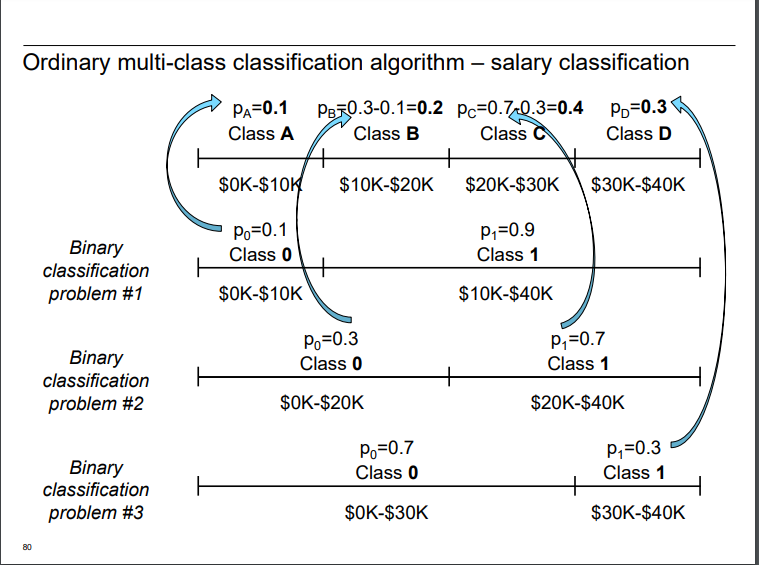

#### Image Source : MIE 1624 Lecture slides 

- In the dataset we have a total of 15 unique target labels. So we need to form 14 models to predict each label's probabilities. For that I need to encode my target set by 0 and 1. (i.e. if I want to predict probabilities for target value 0, I need to encode 0 with 1 and rest of the dataset with 0. It will give me a matrix of 0s and 1s probabilities. I need to choose 1s probabilities as I have encoded my target cell with 1. After then if I need to find probabilities for target variable 1, I need to encode 0 and 1 as 1 and the rest of the data set with 0. It will give me probabilities for 0 and 1. To find the probabilities of label 1 I need to subtract the probabilities of only label 0 from probabilities of 0 and 1. and so on.  

- I am encoding my target variable as 1 and the rest of the targets with 0 in particular model formation. The reason being probability function works on the same basis of the sigmoid function. So encoding as 0 or encoding it with 1, does not change the outcome. I just need to take probabilities of 1s in the probability matrix just because I have encoded my target variable as 1. 

## Model 0:

In [410]:
# for variable 0:

y1_0 = []  # creating an empty list to store the encoded target variables
for i in y1_train.index: ###################################################################################################
    if y1_train[i]==0:   #encoding target variables to get the probability for variable 0.
        y1_0.append(1)   # so if my variable is 0 it would be encoded as 1 and rest of the variables as 0.
    else:                ###################################################################################################
        y1_0.append(0)
              
model0 = LogisticRegression(solver='liblinear', random_state=0) 

model0.fit(X1_train, y1_0) #fitting logistic regression model with encoded target variable


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
prob_0 = model0.predict_proba(X1_test)*100 # finding the probabilities for  0s and 1s
var_0_prob = prob_0[ : ,1] # probability of variable 0
var_0_prob = var_0_prob.clip(min=0) # converting all negative probabilities into zero
var_0_prob

array([ 1.02575848, 12.809295  , 85.33499186, ..., 10.5462053 ,
       93.8032566 ,  7.36922262])

## Model 1:

In [183]:
# for target variable 1
y1_1 = [] # creating an empty list to store the encoded target variables
for i in y1_train.index:
    if y1_train[i]<= 1: # encoding target variables to get the probability for variable 1. so if my variable is <=1 it would....
        y1_1.append(1) #.... be encoded as 1 and rest of the variables as 0
    else: 
        y1_1.append(0)


model1 = LogisticRegression(solver='liblinear', random_state=0)

model1.fit(X1_train, y1_1) #fitting logistic regression model with encoded target variable


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
prob_1 = model1.predict_proba(X1_test)*100

In [185]:
var_1_prob = prob_1[ : , 1] - prob_0[ : ,1] 
# probability of variable 1 ( prob. of class(0,1) variables minus prob class 0)
var_1_prob = var_1_prob.clip(min=0)
var_1_prob # probabilities of variable 1

array([ 0.54134249,  0.70164764,  7.64457769, ..., 16.1352036 ,
        4.39399453, 12.24210269])

## Model 2:

In [186]:
y1_2 = []
for i in y1_train.index:
    if y1_train[i]<= 2:
        y1_2.append(1)
    else: 
        y1_2.append(0)

model2 = LogisticRegression(solver='liblinear', random_state=0)

model2.fit(X1_train, y1_2)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [187]:
prob_2 = model2.predict_proba(X1_test)*100
var_2_prob = prob_2[ : , 1] - prob_1[ : ,1]
var_2_prob= var_2_prob.clip(min=0)
var_2_prob # probabilities of variable 2

array([ 1.62046605,  3.44363308,  2.61675725, ..., 27.57160159,
        0.        ,  8.79208954])

## Model 3:

In [188]:
y1_3 = []
for i in y1_train.index:
    if y1_train[i]<= 3:
        y1_3.append(1)
    else: 
        y1_3.append(0)

model3 = LogisticRegression(solver='liblinear', random_state=0)

model3.fit(X1_train, y1_3)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [192]:

prob_3 = model3.predict_proba(X1_test)*100
var_3_prob = prob_3[ : , 1] - prob_2[ : ,1]
var_3_prob = var_3_prob.clip(min=0)
var_3_prob # probabilities of variable 3

array([ 0.        ,  0.        ,  2.41031931, ...,  0.02630468,
        0.        , 16.44234228])

## Model 4:

In [193]:
y1_4 = []
for i in y1_train.index:
    if y1_train[i]<= 4:
        y1_4.append(1)
    else: 
        y1_4.append(0)

model4 = LogisticRegression(solver='liblinear', random_state=0)

model4.fit(X1_train, y1_4)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
prob_4 = model4.predict_proba(X1_test)*100
var_4_prob = prob_4[ : , 1] - prob_3[ : ,1]
var_4_prob = var_4_prob.clip(min=0)
var_4_prob # probabilities of variable 4

array([ 0.        , 10.157751  ,  0.98528696, ..., 19.43899102,
        1.3072025 , 22.20501213])

## Model 5:

In [198]:
y1_5 = []
for i in y1_train.index:
    if y1_train[i]<= 5:
        y1_5.append(1)
    else: 
        y1_5.append(0)

model5 = LogisticRegression(solver='liblinear', random_state=0)

model5.fit(X1_train, y1_5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [199]:
prob_5 = model5.predict_proba(X1_test)*100
var_5_prob = prob_5[ : , 1] - prob_4[ : ,1]
var_5_prob = var_5_prob.clip(min=0)
var_5_prob # probabilities of variable 5

array([ 3.52128527,  4.04131337,  0.80001131, ..., 16.2243306 ,
        0.        ,  7.40371714])

## Model 6:

In [200]:
y1_6 = []
for i in y1_train.index:
    if y1_train[i]<= 6:
        y1_6.append(1)
    else: 
        y1_6.append(0)


model6 = LogisticRegression(solver='liblinear', random_state=0)

model6.fit(X1_train, y1_6)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
prob_6 = model6.predict_proba(X1_test)*100
var_6_prob = prob_6[ : , 1] - prob_5[ : ,1]
var_6_prob =var_6_prob.clip(min=0)
var_6_prob # probabilities of variable 6

array([ 2.28509693,  5.37024897,  0.0142785 , ...,  4.33931382,
        0.96880902, 13.52984226])

## Model 7:

In [202]:
y1_7 = []
for i in y1_train.index:
    if y1_train[i]<= 7:
        y1_7.append(1)
    else: 
        y1_7.append(0)

model7 = LogisticRegression(solver='liblinear', random_state=0)

model7.fit(X1_train, y1_7)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [203]:
prob_7 = model7.predict_proba(X1_test)*100
var_7_prob = prob_7[ : , 1] - prob_6[ : ,1]
var_7_prob = var_7_prob.clip(min=0)
var_7_prob # probabilities of variable 7

array([ 3.0698273 , 11.16727266,  0.18236476, ...,  0.7939609 ,
        0.        ,  0.        ])

## Model 8:

In [204]:
y1_8 = []
for i in y1_train.index:
    if y1_train[i]<= 8:
        y1_8.append(1)
    else: 
        y1_8.append(0)


model8 = LogisticRegression(solver='liblinear', random_state=0)

model8.fit(X1_train, y1_8)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [205]:
prob_8 = model8.predict_proba(X1_test)*100
var_8_prob = prob_8[ : , 1] - prob_7[ : ,1]
var_8_prob = var_8_prob.clip(min=0)
var_8_prob # probabilities of variable 8

array([3.65276373, 3.80759282, 0.        , ..., 1.43165834, 0.41589849,
       0.        ])

## Model 9:

In [206]:
y1_9 = []
for i in y1_train.index:
    if y1_train[i]<= 9:
        y1_9.append(1)
    else: 
        y1_9.append(0)

model9 = LogisticRegression(solver='liblinear', random_state=0)

model9.fit(X1_train, y1_9)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [207]:
prob_9 = model9.predict_proba(X1_test)*100
var_9_prob = prob_9[ : , 1] - prob_8[ : ,1]
var_9_prob = var_9_prob.clip(min=0)
var_9_prob # probabilities of variable 9

array([7.16918912e-02, 8.88753414e+00, 2.18687651e-03, ...,
       5.20596873e-01, 0.00000000e+00, 0.00000000e+00])

## Model 10:

In [208]:
y1_10 = []
for i in y1_train.index:
    if y1_train[i]<= 10:
        y1_10.append(1)
    else: 
        y1_10.append(0)


model10 = LogisticRegression(solver='liblinear', random_state=0)

model10.fit(X1_train, y1_10)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [209]:
prob_10 = model10.predict_proba(X1_test)*100
var_10_prob = prob_10[ : , 1] - prob_9[ : ,1]
var_10_prob = var_10_prob.clip(min=0) # probabilities of variable 10

## Model 11:

In [210]:
y1_11 = []
for i in y1_train.index:
    if y1_train[i]<= 11:
        y1_11.append(1)
    else: 
        y1_11.append(0)


model11 = LogisticRegression(solver='liblinear', random_state=0)

model11.fit(X1_train, y1_11)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [211]:
prob_11 = model11.predict_proba(X1_test)*100
var_11_prob = prob_11[ : , 1] - prob_10[ : ,1]
var_11_prob = var_11_prob.clip(min=0)
var_11_prob # probabilities of variable 11

array([4.20041160e+01, 1.30825719e+01, 3.26613518e-03, ...,
       0.00000000e+00, 0.00000000e+00, 4.74338609e-01])

## Model 12:

In [212]:
y1_12 = []
for i in y1_train.index:
    if y1_train[i]<= 12:
        y1_12.append(1)
    else: 
        y1_12.append(0)


model12 = LogisticRegression(solver='liblinear', random_state=0)

model12.fit(X1_train, y1_12)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [213]:
prob_12 = model12.predict_proba(X1_test)*100
var_12_prob = prob_12[ : , 1] - prob_11[ : ,1]
var_12_prob = var_12_prob.clip(min=0)
var_12_prob # probabilities of variable 12

array([1.84367859e+01, 9.68417837e+00, 6.54169858e-04, ...,
       6.13075802e-01, 7.80961060e+00, 0.00000000e+00])

## Model 13:

In [214]:
y1_13 = []
for i in y1_train.index:
    if y1_train[i]<= 13:
        y1_13.append(1)
    else: 
        y1_13.append(0)

model13 = LogisticRegression(solver='liblinear', random_state=0)

model13.fit(X1_train, y1_13)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [215]:
prob_13 = model13.predict_proba(X1_test)*100
var_13_prob = prob_13[ : , 1] - prob_12[ : ,1]
var_13_prob = var_13_prob.clip(min=0)
var_13_prob # probabilities of variable 13

array([1.3204777 , 4.90918229, 0.        , ..., 0.28736982, 0.        ,
       0.91351584])

In [430]:
prob_14 = 100 - prob_13  # probabilities of variable 14
var_14_prob = prob_14[ : , 1]
var_14_prob = var_14_prob.clip(min=0)

# making a list of all target variables' probabilities 
probs = [var_0_prob,var_1_prob,var_2_prob,var_3_prob,var_4_prob,var_5_prob,var_6_prob,var_7_prob,var_8_prob,var_9_prob,var_10_prob,var_11_prob,var_12_prob,var_13_prob,var_14_prob]
probs = pd.DataFrame(probs) #converting it into dataframe

################################################################################################################
# As I have converted some negative probabilities into zero, I need to normalise my data.
# so that addition of all probabilities would become 1.
################################################################################################################

min_max_scaler = preprocessing.MinMaxScaler()
probs = min_max_scaler.fit_transform(probs)
probs = pd.DataFrame(probs)

################################################################################################################
# selecting the index of the max value of the feature which gives us the target label
################################################################################################################

pred = probs.idxmax(axis=0) 


In [428]:
true_values= np.array(y1_test) #original target
predictions = np.array(pred)   # prediction values

# finding accuracy
accuracy = np.sum(true_values == predictions) / true_values.size
print ("Accuracy of the ordinal regression model is: ", accuracy * 100, "%")

Accuracy of the ordinal regression model is:  37.04 %


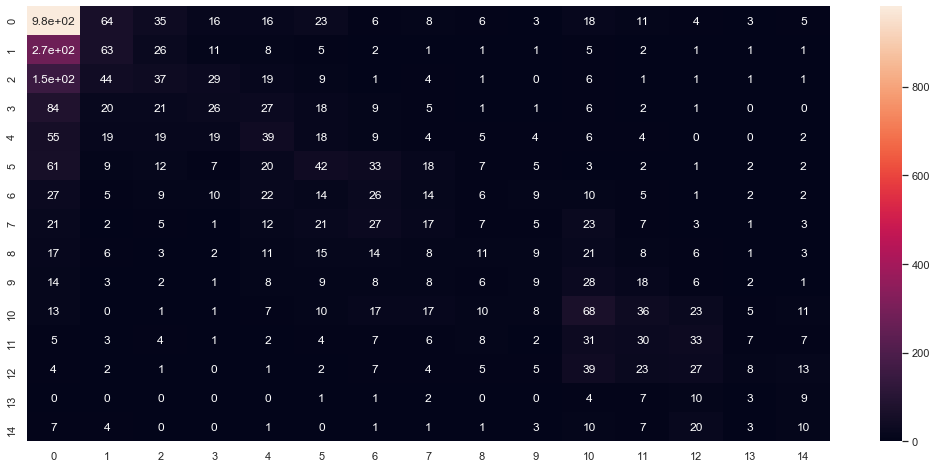

In [426]:
cnf_matrix = confusion_matrix(true_values, predictions)
sns.heatmap(cnf_matrix , annot=True)
sns.set(rc={'figure.figsize':(18,8)})

In [219]:
print(classification_report(true_values,predictions))

              precision    recall  f1-score   support

           0       0.57      0.82      0.67      1199
           1       0.26      0.16      0.20       401
           2       0.21      0.12      0.15       304
           3       0.21      0.12      0.15       221
           4       0.20      0.19      0.20       203
           5       0.22      0.19      0.20       224
           6       0.15      0.16      0.16       162
           7       0.15      0.11      0.13       155
           8       0.15      0.08      0.10       135
           9       0.14      0.07      0.10       123
          10       0.24      0.30      0.27       227
          11       0.18      0.20      0.19       150
          12       0.20      0.19      0.19       141
          13       0.08      0.08      0.08        37
          14       0.14      0.15      0.14        68

    accuracy                           0.37      3750
   macro avg       0.21      0.20      0.20      3750
weighted avg       0.32   

### CONCLUSION FOR THE MODEL WITHOUT TUNING:

- Final accuracy of our model is 37% which shows that our model is underfitting as testing accuracy is too low. 
- As we can see for target 0, all values of classification report are highest compare to other targets. Our model is working good for target variable 0. (High Bias) 
- Highest recall for 0 says that in predicting actual zero target, our model is working really good. 
- whereas our model is working poor with target variable 13 as precision and recall is very low 0.08. 
-  From the heatmap of confusion matrix we can see that in 0,1,2,10,11 and 12 target variables, the spread of the predicted values are concentrated near to the respective target. It shows that in these variables our model variance is low. 

## (5) HYPERPARAMETERS TUNING_______________________________________________

**In order to get the best accuracy we need to tune hyperparameters of the model which can give the best fit to the data.**

I will tune two parameters C and Solver.

C --- It is inverse of the penalty lambda. This penalty is applied for regularization to increase the values of parameters in order to deal with overfitting.

Solver --- Scikit-learn has 5 different solvers. Each solver tries to find parameters weights to minimize the cost function.

I have used two different codes for hyperparameters tuning with 10 fold cross validation.** 
1. Code from the tutorial 
2. Using GridSearchCV function from sklearn.model_selection

In [112]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

### 1. Hyperparameter tuning with the Code from the tutorial 

In [128]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10) # defining kfold for 10 fold cross validation 
kfold.get_n_splits(X1)     #splitting features in 10 folds

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]: #different penalty values
    for solver in ['newton-cg','lbfgs','liblinear','sag','saga']: # different solvers
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X1):  #splitting 10 folds with train and test dataset
            X1_train_f, X1_test = X1.values[train_idx], X1.values[test_idx]
            y1_0f_train, y1_0f_test = y1_0f.values[train_idx], y1_0f.values[test_idx]

            model.fit(X1_train_f, y1_0f_train) # fitting model to our train data

            predictions = model.predict(X1_test) # predicting target on our test data

            TN = confusion_matrix(y1_0f_test, predictions)[0][0]
            FP = confusion_matrix(y1_0f_test, predictions)[0][1]
            FN = confusion_matrix(y1_0f_test, predictions)[1][0]
            TP = confusion_matrix(y1_0f_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total) # defining accuracy

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:       #######################################################################
            best_model = model                      # Finding best Solver and C
            best_params = {'C':C, 'solver':solver}  #######################################################################
            best_accuracy = np.mean(accuracy)       # Findng mean accuracy from 10 folds
                                                    #######################################################################
            best_std = np.std(accuracy)             # Finding variance of accuracies within 10 folds
                                                    #######################################################################
print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 0.5, 'solver': 'newton-cg'}
Best Score: 78.97%(3.579%)

The optimal log model uses C=0.5, and a newton-cg solver, and has a cross validation score of 78.97% with a standard deviation of 3.579%


In [357]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X1)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag','saga']:
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X1):
            X1_train_f, X1_test = X1.values[train_idx], X1.values[test_idx]
            y1_1f_train, y1_1f_test = y1_1f.values[train_idx], y1_1f.values[test_idx]

            model.fit(X1_train_f, y1_1f_train)

            predictions = model.predict(X1_test)

            TN = confusion_matrix(y1_1f_test, predictions)[0][0]
            FP = confusion_matrix(y1_1f_test, predictions)[0][1]
            FN = confusion_matrix(y1_1f_test, predictions)[1][0]
            TP = confusion_matrix(y1_1f_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 0.5, 'solver': 'liblinear'}
Best Score: 80.739%(2.203%)

The optimal log model uses C=0.5, and a liblinear solver, and has a cross validation score of 80.739% with a standard deviation of 2.203%


In [129]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X1)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag','saga']:
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X1):
            X1_train_f, X1_test = X1.values[train_idx], X1.values[test_idx]
            y1_2f_train, y1_2f_test = y1_2f.values[train_idx], y1_2f.values[test_idx]

            model.fit(X1_train_f, y1_2f_train)

            predictions = model.predict(X1_test)

            TN = confusion_matrix(y1_2f_test, predictions)[0][0]
            FP = confusion_matrix(y1_2f_test, predictions)[0][1]
            FN = confusion_matrix(y1_2f_test, predictions)[1][0]
            TP = confusion_matrix(y1_2f_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 1, 'solver': 'newton-cg'}
Best Score: 82.499%(1.785%)

The optimal log model uses C=1, and a newton-cg solver, and has a cross validation score of 82.499% with a standard deviation of 1.785%


In [130]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X1)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag','saga']:
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X1):
            X1_train_f, X1_test = X1.values[train_idx], X1.values[test_idx]
            y1_3f_train, y1_3f_test = y1_3f.values[train_idx], y1_3f.values[test_idx]

            model.fit(X1_train_f, y1_3f_train)

            predictions = model.predict(X1_test)

            TN = confusion_matrix(y1_3f_test, predictions)[0][0]
            FP = confusion_matrix(y1_3f_test, predictions)[0][1]
            FN = confusion_matrix(y1_3f_test, predictions)[1][0]
            TP = confusion_matrix(y1_3f_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 1, 'solver': 'newton-cg'}
Best Score: 83.484%(1.071%)

The optimal log model uses C=1, and a newton-cg solver, and has a cross validation score of 83.484% with a standard deviation of 1.071%


In [131]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X1)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag','saga']:
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X1):
            X1_train_f, X1_test = X1.values[train_idx], X1.values[test_idx]
            y1_4f_train, y1_4f_test = y1_4f.values[train_idx], y1_4f.values[test_idx]

            model.fit(X1_train_f, y1_4f_train)

            predictions = model.predict(X1_test)

            TN = confusion_matrix(y1_4f_test, predictions)[0][0]
            FP = confusion_matrix(y1_4f_test, predictions)[0][1]
            FN = confusion_matrix(y1_4f_test, predictions)[1][0]
            TP = confusion_matrix(y1_4f_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 5, 'solver': 'liblinear'}
Best Score: 84.748%(1.159%)

The optimal log model uses C=5, and a liblinear solver, and has a cross validation score of 84.748% with a standard deviation of 1.159%


In [132]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X1)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag','saga']:
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X1):
            X1_train_f, X1_test = X1.values[train_idx], X1.values[test_idx]
            y1_5f_train, y1_5f_test = y1_5f.values[train_idx], y1_5f.values[test_idx]

            model.fit(X1_train_f, y1_5f_train)

            predictions = model.predict(X1_test)

            TN = confusion_matrix(y1_5f_test, predictions)[0][0]
            FP = confusion_matrix(y1_5f_test, predictions)[0][1]
            FN = confusion_matrix(y1_5f_test, predictions)[1][0]
            TP = confusion_matrix(y1_5f_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 1, 'solver': 'liblinear'}
Best Score: 86.165%(0.983%)

The optimal log model uses C=1, and a liblinear solver, and has a cross validation score of 86.165% with a standard deviation of 0.983%


In [358]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X1)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag','saga']:
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X1):
            X1_train_f, X1_test = X1.values[train_idx], X1.values[test_idx]
            y1_6f_train, y1_6f_test = y1_6f.values[train_idx], y1_6f.values[test_idx]

            model.fit(X1_train_f, y1_6f_train)

            predictions = model.predict(X1_test)

            TN = confusion_matrix(y1_6f_test, predictions)[0][0]
            FP = confusion_matrix(y1_6f_test, predictions)[0][1]
            FN = confusion_matrix(y1_6f_test, predictions)[1][0]
            TP = confusion_matrix(y1_6f_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 100, 'solver': 'newton-cg'}
Best Score: 87.141%(1.262%)

The optimal log model uses C=100, and a newton-cg solver, and has a cross validation score of 87.141% with a standard deviation of 1.262%


In [359]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X1)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag','saga']:
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X1):
            X1_train_f, X1_test = X1.values[train_idx], X1.values[test_idx]
            y1_7f_train, y1_7f_test = y1_7f.values[train_idx], y1_7f.values[test_idx]

            model.fit(X1_train_f, y1_7f_train)

            predictions = model.predict(X1_test)

            TN = confusion_matrix(y1_7f_test, predictions)[0][0]
            FP = confusion_matrix(y1_7f_test, predictions)[0][1]
            FN = confusion_matrix(y1_7f_test, predictions)[1][0]
            TP = confusion_matrix(y1_7f_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 10, 'solver': 'newton-cg'}
Best Score: 88.069%(1.19%)

The optimal log model uses C=10, and a newton-cg solver, and has a cross validation score of 88.069% with a standard deviation of 1.19%


In [360]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X1)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag','saga']:
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X1):
            X1_train_f, X1_test = X1.values[train_idx], X1.values[test_idx]
            y1_8f_train, y1_8f_test = y1_8f.values[train_idx], y1_8f.values[test_idx]

            model.fit(X1_train_f, y1_8f_train)

            predictions = model.predict(X1_test)

            TN = confusion_matrix(y1_8f_test, predictions)[0][0]
            FP = confusion_matrix(y1_8f_test, predictions)[0][1]
            FN = confusion_matrix(y1_8f_test, predictions)[1][0]
            TP = confusion_matrix(y1_8f_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 1, 'solver': 'newton-cg'}
Best Score: 88.63%(1.529%)

The optimal log model uses C=1, and a newton-cg solver, and has a cross validation score of 88.63% with a standard deviation of 1.529%


In [361]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X1)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag','saga']:
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X1):
            X1_train_f, X1_test = X1.values[train_idx], X1.values[test_idx]
            y1_9f_train, y1_9f_test = y1_9f.values[train_idx], y1_9f.values[test_idx]

            model.fit(X1_train_f, y1_9f_train)

            predictions = model.predict(X1_test)

            TN = confusion_matrix(y1_9f_test, predictions)[0][0]
            FP = confusion_matrix(y1_9f_test, predictions)[0][1]
            FN = confusion_matrix(y1_9f_test, predictions)[1][0]
            TP = confusion_matrix(y1_9f_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 0.5, 'solver': 'newton-cg'}
Best Score: 89.774%(1.891%)

The optimal log model uses C=0.5, and a newton-cg solver, and has a cross validation score of 89.774% with a standard deviation of 1.891%


In [362]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X1)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag','saga']:
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X1):
            X1_train_f, X1_test = X1.values[train_idx], X1.values[test_idx]
            y1_10f_train, y1_10f_test = y1_10f.values[train_idx], y1_10f.values[test_idx]

            model.fit(X1_train_f, y1_10f_train)

            predictions = model.predict(X1_test)

            TN = confusion_matrix(y1_10f_test, predictions)[0][0]
            FP = confusion_matrix(y1_10f_test, predictions)[0][1]
            FN = confusion_matrix(y1_10f_test, predictions)[1][0]
            TP = confusion_matrix(y1_10f_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 0.1, 'solver': 'lbfgs'}
Best Score: 92.127%(1.824%)

The optimal log model uses C=0.1, and a lbfgs solver, and has a cross validation score of 92.127% with a standard deviation of 1.824%


In [363]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X1)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag','saga']:
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X1):
            X1_train_f, X1_test = X1.values[train_idx], X1.values[test_idx]
            y1_11f_train, y1_11f_test = y1_11f.values[train_idx], y1_11f.values[test_idx]

            model.fit(X1_train_f, y1_11f_train)

            predictions = model.predict(X1_test)

            TN = confusion_matrix(y1_11f_test, predictions)[0][0]
            FP = confusion_matrix(y1_11f_test, predictions)[0][1]
            FN = confusion_matrix(y1_11f_test, predictions)[1][0]
            TP = confusion_matrix(y1_11f_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 1, 'solver': 'lbfgs'}
Best Score: 94.431%(1.517%)

The optimal log model uses C=1, and a lbfgs solver, and has a cross validation score of 94.431% with a standard deviation of 1.517%


In [364]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X1)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag','saga']:
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X1):
            X1_train_f, X1_test = X1.values[train_idx], X1.values[test_idx]
            y1_12f_train, y1_12f_test = y1_12f.values[train_idx], y1_12f.values[test_idx]

            model.fit(X1_train_f, y1_12f_train)

            predictions = model.predict(X1_test)

            TN = confusion_matrix(y1_12f_test, predictions)[0][0]
            FP = confusion_matrix(y1_12f_test, predictions)[0][1]
            FN = confusion_matrix(y1_12f_test, predictions)[1][0]
            TP = confusion_matrix(y1_12f_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 0.05, 'solver': 'newton-cg'}
Best Score: 97.007%(0.908%)

The optimal log model uses C=0.05, and a newton-cg solver, and has a cross validation score of 97.007% with a standard deviation of 0.908%


In [365]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X1)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag','saga']:
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X1):
            X1_train_f, X1_test = X1.values[train_idx], X1.values[test_idx]
            y1_13f_train, y1_13f_test = y1_13f.values[train_idx], y1_13f.values[test_idx]

            model.fit(X1_train_f, y1_13f_train)

            predictions = model.predict(X1_test)

            TN = confusion_matrix(y1_13f_test, predictions)[0][0]
            FP = confusion_matrix(y1_13f_test, predictions)[0][1]
            FN = confusion_matrix(y1_13f_test, predictions)[1][0]
            TP = confusion_matrix(y1_13f_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 0.01, 'solver': 'newton-cg'}
Best Score: 98.24%(0.569%)

The optimal log model uses C=0.01, and a newton-cg solver, and has a cross validation score of 98.24% with a standard deviation of 0.569%


## Testing with best parameters after 10 fold cross validation grid search__________

In [140]:
model0_b = LogisticRegression(C = 0.5 ,solver='newton-cg', random_state=0)
model0_b.fit(X1_train, y1_0)
prob_0_b = model0_b.predict_proba(X1_test)*100
var_0_prob_b = prob_0_b[ : ,1] 

In [141]:
model1_b = LogisticRegression(C = 0.5 ,solver='liblinear', random_state=0)
model1_b.fit(X1_train, y1_1)
prob_1_b = model1_b.predict_proba(X1_test)*100
var_1_prob_b = prob_1_b[ : ,1] - prob_0_b[ : ,1]

In [142]:
model2_b = LogisticRegression(C = 1 ,solver='newton-cg', random_state=0)
model2_b.fit(X1_train, y1_2)
prob_2_b = model2_b.predict_proba(X1_test)*100
var_2_prob_b = prob_2_b[ : ,1] - prob_1_b[ : ,1]

In [143]:
model3_b = LogisticRegression(C = 1 ,solver='newton-cg', random_state=0)
model3_b.fit(X1_train, y1_3)
prob_3_b = model3_b.predict_proba(X1_test)*100
var_3_prob_b = prob_3_b[ : ,1] - prob_2_b[ : ,1]

In [145]:
model4_b = LogisticRegression(C = 5 ,solver='liblinear', random_state=0)
model4_b.fit(X1_train, y1_4)
prob_4_b = model4_b.predict_proba(X1_test)*100
var_4_prob_b = prob_4_b[ : ,1] - prob_3_b[ : ,1]

In [146]:
model5_b = LogisticRegression(C = 1 ,solver='liblinear', random_state=0)
model5_b.fit(X1_train, y1_5)
prob_5_b = model5_b.predict_proba(X1_test)*100
var_5_prob_b = prob_5_b[ : ,1] - prob_4_b[ : ,1]

In [147]:
model6_b = LogisticRegression(C = 100 ,solver='newton-cg', random_state=0)
model6_b.fit(X1_train, y1_6)
prob_6_b = model6_b.predict_proba(X1_test)*100
var_6_prob_b = prob_6_b[ : ,1] - prob_5_b[ : ,1]

In [148]:
model7_b = LogisticRegression(C = 10 ,solver='newton-cg', random_state=0)
model7_b.fit(X1_train, y1_7)
prob_7_b = model7_b.predict_proba(X1_test)*100
var_7_prob_b = prob_7_b[ : ,1] - prob_6_b[ : ,1]

In [149]:
model8_b = LogisticRegression(C = 1 ,solver='newton-cg', random_state=0)
model8_b.fit(X1_train, y1_8)
prob_8_b = model8_b.predict_proba(X1_test)*100
var_8_prob_b = prob_8_b[ : ,1] - prob_7_b[ : ,1]

In [150]:
model9_b = LogisticRegression(C = 0.5 ,solver='newton-cg', random_state=0)
model9_b.fit(X1_train, y1_9)
prob_9_b = model9_b.predict_proba(X1_test)*100
var_9_prob_b = prob_9_b[ : ,1] - prob_8_b[ : ,1]

In [151]:
model10_b = LogisticRegression(C = 0.1 ,solver='lbfgs', random_state=0)
model10_b.fit(X1_train, y1_10)
prob_10_b = model10_b.predict_proba(X1_test)*100
var_10_prob_b = prob_10_b[ : ,1] - prob_9_b[ : ,1]

In [152]:
model11_b = LogisticRegression(C = 1 ,solver='lbfgs', random_state=0)
model11_b.fit(X1_train, y1_11)
prob_11_b = model11_b.predict_proba(X1_test)*100
var_11_prob_b = prob_11_b[ : ,1] - prob_10_b[ : ,1]

In [153]:
model12_b = LogisticRegression(C = 0.05 ,solver='newton-cg', random_state=0)
model12_b.fit(X1_train, y1_12)
prob_12_b = model12_b.predict_proba(X1_test)*100
var_12_prob_b = prob_12_b[ : ,1] - prob_11_b[ : ,1]

In [154]:
model13_b = LogisticRegression(C = 0.01 ,solver='newton-cg', random_state=0)
model13_b.fit(X1_train, y1_13)
prob_13_b = model13_b.predict_proba(X1_test)*100
var_13_prob_b = prob_13_b[ : ,1] - prob_12_b[ : ,1]

In [155]:
prob_14_b = 100 - prob_13_b
var_14_prob_b = prob_14_b[ : , 1]
probs_b = [var_0_prob_b,var_1_prob_b,var_2_prob_b,var_3_prob_b,var_4_prob_b,var_5_prob_b,var_6_prob_b,var_7_prob_b,var_8_prob_b,var_9_prob_b,var_10_prob_b,var_11_prob_b,var_12_prob_b,var_13_prob_b,var_14_prob_b]
probs_b = pd.DataFrame(probs_b)
pred_b = probs_b.idxmax(axis=0)

In [264]:
true_values_b= np.array(y1_test)
predictions_b = np.array(pred_b)

accuracy_b = np.sum(true_values_b == predictions_b) / true_values_b.size
print ("Accuracy of the ordinal regression model is: ", accuracy_b * 100, "%")

Accuracy of the ordinal regression model is:  37.06666666666666 %


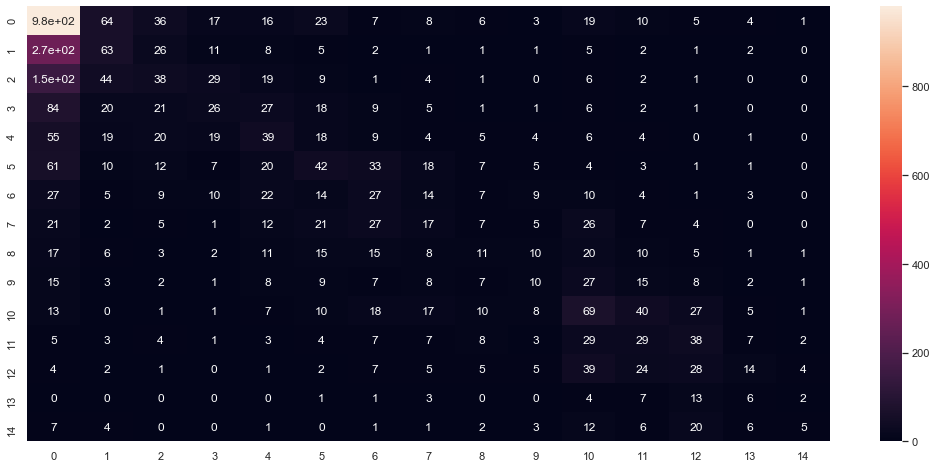

In [421]:
cnf_matrix_b = confusion_matrix(true_values_b, predictions_b)
sns.heatmap(cnf_matrix_b , annot=True)
sns.set(rc={'figure.figsize':(18,8)})

In [352]:
print(classification_report(true_values_b,predictions_b))

              precision    recall  f1-score   support

           0       0.57      0.82      0.67      1199
           1       0.26      0.16      0.20       401
           2       0.21      0.12      0.16       304
           3       0.21      0.12      0.15       221
           4       0.20      0.19      0.20       203
           5       0.22      0.19      0.20       224
           6       0.16      0.17      0.16       162
           7       0.14      0.11      0.12       155
           8       0.14      0.08      0.10       135
           9       0.15      0.08      0.11       123
          10       0.24      0.30      0.27       227
          11       0.18      0.19      0.18       150
          12       0.18      0.20      0.19       141
          13       0.12      0.16      0.13        37
          14       0.29      0.07      0.12        68

    accuracy                           0.37      3750
   macro avg       0.22      0.20      0.20      3750
weighted avg       0.32   

### After hypertuning and testing model with best hyperparameters, the model gives 37.07% accuracy. There's only an increase of 0.03% which is nothing.  Let's try GridSearchCV for tuning the data.

### 2.  Hyperparameter tuning using GridSearchCV function from sklearn.model_selection

In [223]:
C = [0.001,0.01,0.05,0.1,0.5,1,5,10, 100] 
solver =  ['newton-cg','lbfgs','liblinear','sag','saga']
hyperparameters = dict(C=C, solver=solver) # making dictionary of all hyperparameters

In [227]:
tuning0 = GridSearchCV(model0, hyperparameters, cv=10, verbose=0) #applying GridSearchCV to model 0 
tuning1 = GridSearchCV(model1, hyperparameters, cv=10, verbose=0) #applying GridSearchCV to model 1
tuning2 = GridSearchCV(model2, hyperparameters, cv=10, verbose=0) #applying GridSearchCV to model 2
tuning3 = GridSearchCV(model3, hyperparameters, cv=10, verbose=0) #applying GridSearchCV to model 3
tuning4 = GridSearchCV(model4, hyperparameters, cv=10, verbose=0) #applying GridSearchCV to model 4
tuning5 = GridSearchCV(model5, hyperparameters, cv=10, verbose=0) #applying GridSearchCV to model 5
tuning6 = GridSearchCV(model6, hyperparameters, cv=10, verbose=0) #applying GridSearchCV to model 6
tuning7 = GridSearchCV(model7, hyperparameters, cv=10, verbose=0) #applying GridSearchCV to model 7
tuning8 = GridSearchCV(model8, hyperparameters, cv=10, verbose=0) #applying GridSearchCV to model 8
tuning9 = GridSearchCV(model9, hyperparameters, cv=10, verbose=0) #applying GridSearchCV to model 9
tuning10 = GridSearchCV(model10, hyperparameters, cv=10, verbose=0) #applying GridSearchCV to model 10
tuning11 = GridSearchCV(model11, hyperparameters, cv=10, verbose=0) #applying GridSearchCV to model 11
tuning12 = GridSearchCV(model12, hyperparameters, cv=10, verbose=0) #applying GridSearchCV to model 12
tuning13 = GridSearchCV(model13, hyperparameters, cv=10, verbose=0) #applying GridSearchCV to model 13

In [228]:
# Fitting training dataset
best_model0 = tuning0.fit(X1_train, y1_0) 
best_model1 = tuning1.fit(X1_train, y1_1)
best_model2 = tuning2.fit(X1_train, y1_2)
best_model3 = tuning3.fit(X1_train, y1_3)
best_model4 = tuning4.fit(X1_train, y1_4)
best_model5 = tuning5.fit(X1_train, y1_5)
best_model6 = tuning6.fit(X1_train, y1_6)
best_model7 = tuning7.fit(X1_train, y1_7)
best_model8 = tuning8.fit(X1_train, y1_8)
best_model9 = tuning9.fit(X1_train, y1_9)
best_model10 = tuning10.fit(X1_train, y1_10)
best_model11 = tuning11.fit(X1_train, y1_11)
best_model12 = tuning12.fit(X1_train, y1_12)
best_model13 = tuning13.fit(X1_train, y1_13)

In [229]:
# printing best parameters of all models
print('Best C for model0:', best_model0.best_estimator_.get_params()['C'])
print('Best solver for model0:', best_model0.best_estimator_.get_params()['solver'])
print('Best C for model1:', best_model1.best_estimator_.get_params()['C'])
print('Best solver for model1:', best_model1.best_estimator_.get_params()['solver'])
print('Best C for model2:', best_model2.best_estimator_.get_params()['C'])
print('Best solver for model2:', best_model2.best_estimator_.get_params()['solver'])
print('Best C for model3:', best_model3.best_estimator_.get_params()['C'])
print('Best solver for model3:', best_model3.best_estimator_.get_params()['solver'])
print('Best C for model4:', best_model4.best_estimator_.get_params()['C'])
print('Best solver for model4:', best_model4.best_estimator_.get_params()['solver'])
print('Best C for model5:', best_model5.best_estimator_.get_params()['C'])
print('Best solver for model5:', best_model5.best_estimator_.get_params()['solver'])
print('Best C for model6:', best_model6.best_estimator_.get_params()['C'])
print('Best solver for model6:', best_model6.best_estimator_.get_params()['solver'])
print('Best C for model7:', best_model7.best_estimator_.get_params()['C'])
print('Best solver for model7:', best_model7.best_estimator_.get_params()['solver'])
print('Best C for model8:', best_model8.best_estimator_.get_params()['C'])
print('Best solver for model8:', best_model8.best_estimator_.get_params()['solver'])
print('Best C for model9:', best_model9.best_estimator_.get_params()['C'])
print('Best solver for model9:', best_model9.best_estimator_.get_params()['solver'])
print('Best C for model10:', best_model10.best_estimator_.get_params()['C'])
print('Best solver for model10:', best_model10.best_estimator_.get_params()['solver'])
print('Best C for model11:', best_model11.best_estimator_.get_params()['C'])
print('Best solver for model11:', best_model11.best_estimator_.get_params()['solver'])
print('Best C for model12:', best_model12.best_estimator_.get_params()['C'])
print('Best solver for model12:', best_model12.best_estimator_.get_params()['solver'])
print('Best C for model13:', best_model13.best_estimator_.get_params()['C'])
print('Best solver for model13:', best_model13.best_estimator_.get_params()['solver'])

Best C for model0: 0.01
Best solver for model0: newton-cg
Best C for model1: 0.01
Best solver for model1: liblinear
Best C for model2: 0.01
Best solver for model2: liblinear
Best C for model3: 0.01
Best solver for model3: liblinear
Best C for model4: 0.01
Best solver for model4: liblinear
Best C for model5: 0.01
Best solver for model5: newton-cg
Best C for model6: 0.01
Best solver for model6: liblinear
Best C for model7: 0.01
Best solver for model7: liblinear
Best C for model8: 0.01
Best solver for model8: liblinear
Best C for model9: 0.01
Best solver for model9: liblinear
Best C for model10: 0.01
Best solver for model10: saga
Best C for model11: 0.01
Best solver for model11: liblinear
Best C for model12: 0.001
Best solver for model12: newton-cg
Best C for model13: 0.01
Best solver for model13: liblinear


## (6) TESTING AND DISCUSSION_______________________________________________

### Testing our models and finding final accuracy using above hyperparameter tuning results.

In [232]:
#testing model 0
model0_g = LogisticRegression(C = 0.01 ,solver='newton-cg', random_state=0)
model0_g.fit(X1_train, y1_0)
prob_0_g = model0_g.predict_proba(X1_test)*100
var_0_prob_g = prob_0_g[ : ,1] 

In [233]:
#testing model 1
model1_g = LogisticRegression(C = 0.01 ,solver='liblinear', random_state=0)
model1_g.fit(X1_train, y1_1)
prob_1_g = model1_g.predict_proba(X1_test)*100
var_1_prob_g = prob_1_g[ : ,1] - prob_0_g[ : ,1]

In [234]:
#testing model 2
model2_g = LogisticRegression(C = 0.01 ,solver='liblinear', random_state=0)
model2_g.fit(X1_train, y1_2)
prob_2_g = model2_g.predict_proba(X1_test)*100
var_2_prob_g = prob_2_g[ : ,1] - prob_1_g[ : ,1]

In [235]:
#testing model 3
model3_g = LogisticRegression(C = 0.01 ,solver='liblinear', random_state=0)
model3_g.fit(X1_train, y1_3)
prob_3_g = model3_g.predict_proba(X1_test)*100
var_3_prob_g = prob_3_g[ : ,1] - prob_2_g[ : ,1]

In [236]:
#testing model 4
model4_g = LogisticRegression(C = 0.01 ,solver='liblinear', random_state=0)
model4_g.fit(X1_train, y1_4)
prob_4_g = model4_g.predict_proba(X1_test)*100
var_4_prob_g = prob_4_g[ : ,1] - prob_3_g[ : ,1]

In [237]:
#testing model 5
model5_g = LogisticRegression(C = 0.01 ,solver='newton-cg', random_state=0)
model5_g.fit(X1_train, y1_5)
prob_5_g = model5_g.predict_proba(X1_test)*100
var_5_prob_g = prob_5_g[ : ,1] - prob_4_g[ : ,1]

In [238]:
#testing model 6
model6_g = LogisticRegression(C = 0.01 ,solver='liblinear', random_state=0)
model6_g.fit(X1_train, y1_6)
prob_6_g = model6_g.predict_proba(X1_test)*100
var_6_prob_g = prob_6_g[ : ,1] - prob_5_g[ : ,1]

In [239]:
#testing model 7
model7_g = LogisticRegression(C = 0.01 ,solver='liblinear', random_state=0)
model7_g.fit(X1_train, y1_7)
prob_7_g = model7_g.predict_proba(X1_test)*100
var_7_prob_g = prob_7_g[ : ,1] - prob_6_g[ : ,1]

In [431]:
#testing model 8
model8_g = LogisticRegression(C = 0.01 ,solver='liblinear', random_state=0)
model8_g.fit(X1_train, y1_8)
prob_8_g = model8_g.predict_proba(X1_test)*100
var_8_prob_g = prob_8_g[ : ,1] - prob_7_g[ : ,1]

In [241]:
#testing model 9
model9_g = LogisticRegression(C = 0.01 ,solver='liblinear', random_state=0)
model9_g.fit(X1_train, y1_9)
prob_9_g = model9_g.predict_proba(X1_test)*100
var_9_prob_g = prob_9_g[ : ,1] - prob_8_g[ : ,1]

In [242]:
#testing model 10
model10_g = LogisticRegression(C = 0.01 ,solver='saga', random_state=0)
model10_g.fit(X1_train, y1_10)
prob_10_g = model10_g.predict_proba(X1_test)*100
var_10_prob_g = prob_10_g[ : ,1] - prob_9_g[ : ,1]

In [243]:
#testing model 11
model11_g = LogisticRegression(C = 0.01 ,solver='liblinear', random_state=0)
model11_g.fit(X1_train, y1_11)
prob_11_g = model11_g.predict_proba(X1_test)*100
var_11_prob_g = prob_11_g[ : ,1] - prob_10_g[ : ,1]

In [244]:
#testing model 12
model12_g = LogisticRegression(C = 0.001 ,solver='newton-cg', random_state=0)
model12_g.fit(X1_train, y1_12)
prob_12_g = model12_g.predict_proba(X1_test)*100
var_12_prob_g = prob_12_g[ : ,1] - prob_11_g[ : ,1]

In [245]:
#testing model 13
model13_g = LogisticRegression(C = 0.01 ,solver='liblinear', random_state=0)
model13_g.fit(X1_train, y1_13)
prob_13_g = model13_g.predict_proba(X1_test)*100
var_13_prob_g = prob_13_g[ : ,1] - prob_12_g[ : ,1]

In [432]:
prob_14_g = 100 - prob_13_g #finding probabilities for label 14
var_14_prob_g = prob_14_g[ : , 1]

################################################################################################################
# As I have converted some negative probabilities into zero, I need to normalise my data.
# so that addition of all probabilities would become 1.
################################################################################################################

probs_g = [var_0_prob_g,var_1_prob_g,var_2_prob_g,var_3_prob_g,var_4_prob_g,var_5_prob_g,var_6_prob_g,var_7_prob_g,var_8_prob_g,var_9_prob_g,var_10_prob_g,var_11_prob_g,var_12_prob_g,var_13_prob_g,var_14_prob_g]
probs_g = pd.DataFrame(probs_g)

min_max_scaler = preprocessing.MinMaxScaler()
probs_g= min_max_scaler.fit_transform(probs_g)
probs_g= pd.DataFrame(probs_g)

################################################################################################################
# selecting the index of the max value of the feature which gives us the target label
################################################################################################################
pred_g = probs_g.idxmax(axis=0) 


In [433]:
true_values_g= np.array(y1_test)
predictions_g = np.array(pred_g)

accuracy_g = np.sum(true_values_g == predictions_g) / true_values_g.size
print ("Accuracy of the ordinal regression model after using GridSearchCV: ", accuracy_g * 100, "%")

Accuracy of the ordinal regression model after using GridSearchCV:  37.62666666666667 %


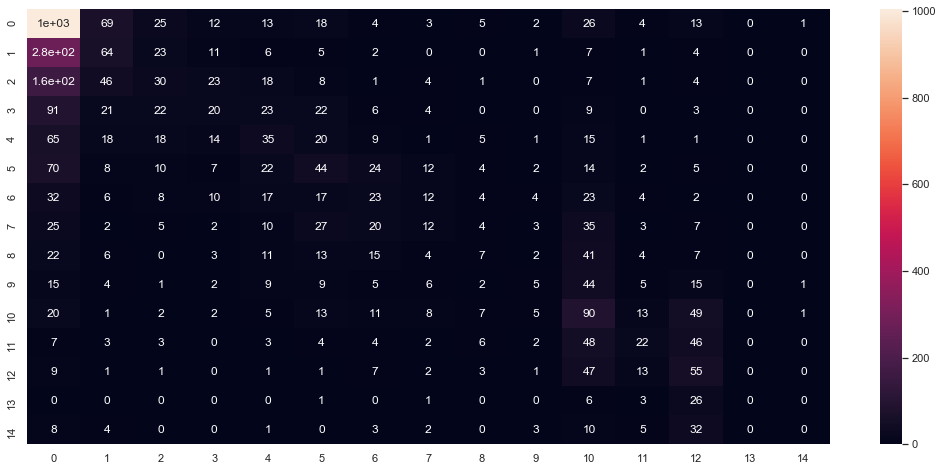

In [434]:
cnf_matrix_g = confusion_matrix(true_values_g, predictions_g)
sns.heatmap(cnf_matrix_g , annot=True)
sns.set(rc={'figure.figsize':(18,8)})

In [435]:
print(classification_report(true_values_g,predictions_g))

              precision    recall  f1-score   support

           0       0.56      0.84      0.67      1199
           1       0.25      0.16      0.20       401
           2       0.20      0.10      0.13       304
           3       0.19      0.09      0.12       221
           4       0.20      0.17      0.19       203
           5       0.22      0.20      0.21       224
           6       0.17      0.14      0.16       162
           7       0.16      0.08      0.11       155
           8       0.15      0.05      0.08       135
           9       0.16      0.04      0.06       123
          10       0.21      0.40      0.28       227
          11       0.27      0.15      0.19       150
          12       0.20      0.39      0.27       141
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00        68

    accuracy                           0.38      3750
   macro avg       0.20      0.19      0.18      3750
weighted avg       0.31   

## Discussion:

### After hyperparameters tuning with GridSearchCV the model accuracy is increased by 0.6%. It is 37.62%. 
### By comparing classification report of the model before tuning and after tuning, we can say that the model is performing good in the target variables 0 and 1 whereas precision and recall parameters are reduced to 0 after hyperparameter tuning for the target variables 13 and 14. Our model is working worst in 13 and 14 target variables. This is because there are too less amount of the data available for target variable 13 and 14. So the model is learning poorly from the available data and could not predict accurately for these targets. I am attaching an image of the number of feature data available for target 13 and 14 to support an argument of less available data to learn the model.  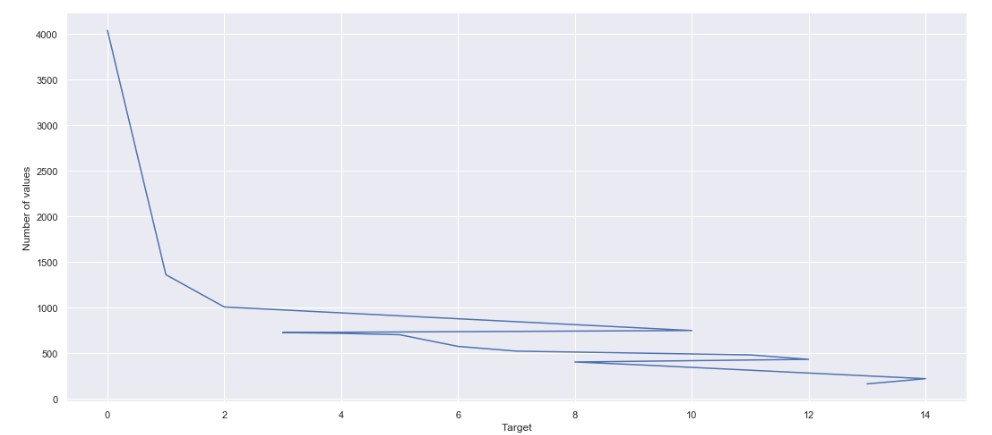


### This is a case of high bias. Our model is not capturing impeccably all the legitimate information of the feature data and the target variables. The model is underfitting. 

### We can also comment from the precision and recall values of each variables. Most of the targets have high precision compare to recall. That tells us about the high bais and low variance in our dataset.

### To improve the accuracy and decrease the bias in training set we can 'stratified' train and test set by using StratifiedShuffleSplit from sklearn. Stratified random sampling restricts the possible samples to those which are less extreme( like in our case target 13 and 14) by ensuring that all target variables are being considered in the train and test set. Stratified split helps to balance our unbalance dataset. 

### We can improve accuracy by selecting proper missing value imputation methods (i.e using KNN or deep learning).

### Logistic regression works on a linear decision surface and gives us a probability based target prediction. It might be possible that features are not linearly separable. So there are other classifiers that can help us to improve accuracy. We can use Support Vector Machines or tree-based classifiers like Random Forest. These classifiers help us to learn more complex decision boundaries. 